In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('myfuturejobs-insights/myfuturejobs_skills2.csv')
df.head()

,index,title,job_details,job_type,ignore_skills,no_ignore_skills,company,company_details,skills,no_skills,education,job_language,job_skills,no_job_skills,ignore_skills.1,no_ignore_skills.1
0,0,SALES ASSOCIATE,* Under supervision and perform duties to prov...,Permanent,Product; Service; Operations,3.0,GLOBAL PSYTECH SDN BHD\n|\nCyberjaya,"Retail trade, except of motor vehicles and mot...","['Product', 'Sales', 'Service', 'Selection', '...",5,4 - STPM / A Level,English,Sales; Selection,2.0,Product; Service; Operations,3.0
1,1,SIGN HOUSE ADVERTISING,Kelebihan diberi kepada yang mempunyai kemahir...,Permanent,NaN,0.0,MR DIY (M) SDN BHD\n|\nSeremban,"Advertising and market research, Printing and ...","['Advertising', 'Adobe Illustrator', 'Adobe Ph...",3,6 - Bachelor's,Others,Advertising; Adobe Illustrator; Adobe Photoshop,3.0,NaN,0.0
2,2,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,Distribution; Operations,2.0,INTER-EXCEL ADVISORY SDN BHD\n|\nKuala Lumpur,"Retail trade, except of motor vehicles and mot...","['Distribution', 'Operations']",2,5 - Diploma / DVM,English,NaN,0.0,Distribution; Operations,2.0
3,3,Petugas PDK,"1. Bertanggungjawab kepada penyelia PDK, jawat...",Permanent,NaN,0.0,IOI PLANTATION SERVICES SDN BHD\n|\nPutrajaya,"Education, Office administrative, office suppo...",[],0,6 - Bachelor's,Others,NaN,0.0,NaN,0.0
4,4,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,Distribution; Operations,2.0,QL Ansan Poultry Farm Sdn Bhd\n|\nPadang Serai,"Retail trade, except of motor vehicles and mot...","['Distribution', 'Operations']",2,3 - SPM / O Level / SKM,English,NaN,0.0,Distribution; Operations,2.0


# Overall Data Analysis

In [3]:
df.describe()

,index,no_ignore_skills,no_skills,no_job_skills,no_ignore_skills.1
count,19680.000000,19680.000000,19680.000000,19680.000000,19680.000000
mean,9839.500000,2.191768,5.710671,3.518902,2.191768
std,5681.270985,2.687912,7.273118,4.920729,2.687912
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4919.750000,0.000000,1.000000,0.000000,0.000000
50%,9839.500000,1.000000,3.000000,2.000000,1.000000
75%,14759.250000,3.000000,7.000000,5.000000,3.000000
max,19679.000000,20.000000,72.000000,53.000000,20.000000


In [4]:
df.describe(include='object')

,title,job_details,job_type,ignore_skills,company,company_details,skills,education,job_language,job_skills,ignore_skills.1
count,19680,19680,19680,13897,19680,19680,19680,19680,19680,14331,13897
unique,4856,3296,6,1649,3340,2699,3466,8,2,2580,1649
top,General Worker,Sales assistants represent the direct contact ...,Permanent,Service,BATARAS SDN. BHD.\n|\nKota Kinabalu,"Retail trade, except of motor vehicles and mot...",[],3 - SPM / O Level / SKM,English,Sales,Service
freq,128,167,15653,615,96,164,2832,8065,16950,381,615


## Job Type

In [5]:
df['job_type'].unique().tolist()

['Permanent',
 'Contract',
 'Apprenticeship',
 'Temporary',
 'Internship',
 'Part-time']

In [6]:
df['job_type'].value_counts(normalize=True) * 100

Permanent         79.537602
Contract          15.772358
Internship         1.371951
Part-time          1.183943
Apprenticeship     1.133130
Temporary          1.001016
Name: job_type, dtype: float64

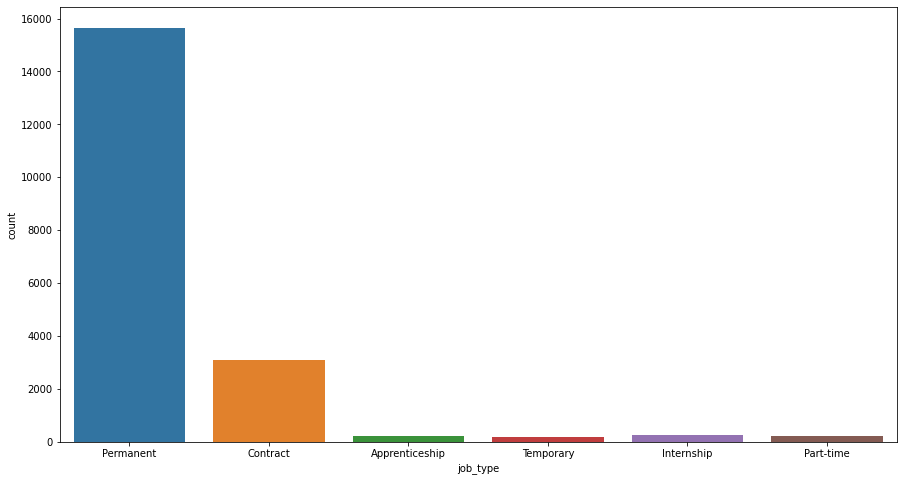

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_type', data=df);

## Education

In [8]:
educations = df['education'].unique().tolist()
educations.sort()
educations

['1 - Primary Education',
 '2 - PMR / PT3',
 '3 - SPM / O Level / SKM',
 '4 - STPM / A Level',
 '5 - Diploma / DVM',
 "6 - Bachelor's",
 "7 - Master's",
 '8 - Doctoral (PhD)']

In [9]:
df['education'].value_counts()

3 - SPM / O Level / SKM    8065
5 - Diploma / DVM          4941
6 - Bachelor's             3962
2 - PMR / PT3              1356
1 - Primary Education       741
4 - STPM / A Level          460
7 - Master's                 96
8 - Doctoral (PhD)           59
Name: education, dtype: int64

In [10]:
df['education'].value_counts(normalize=True) * 100

3 - SPM / O Level / SKM    40.980691
5 - Diploma / DVM          25.106707
6 - Bachelor's             20.132114
2 - PMR / PT3               6.890244
1 - Primary Education       3.765244
4 - STPM / A Level          2.337398
7 - Master's                0.487805
8 - Doctoral (PhD)          0.299797
Name: education, dtype: float64

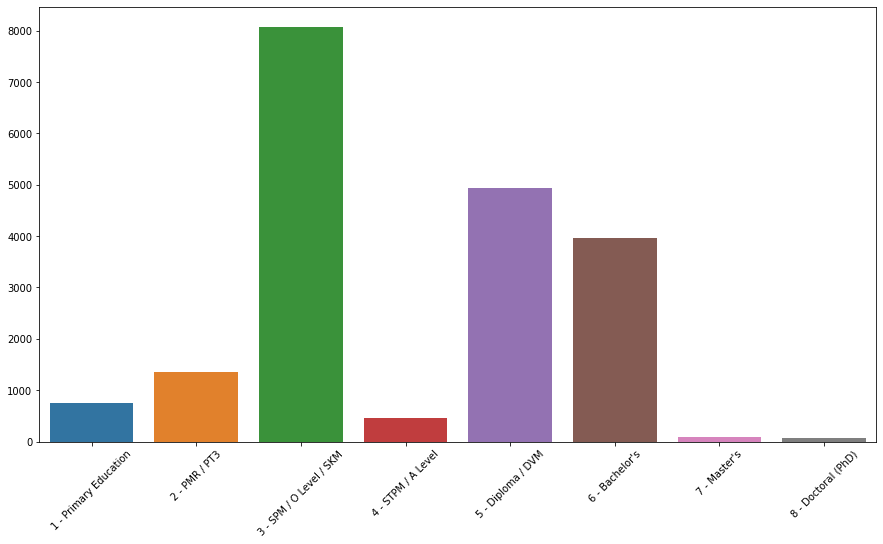

In [11]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Language

In [12]:
languages = df['job_language'].unique().tolist()
languages

['English', 'Others']

In [13]:
df['job_language'].value_counts()

English    16950
Others      2730
Name: job_language, dtype: int64

In [14]:
df['job_language'].value_counts(normalize=True) * 100

English    86.128049
Others     13.871951
Name: job_language, dtype: float64

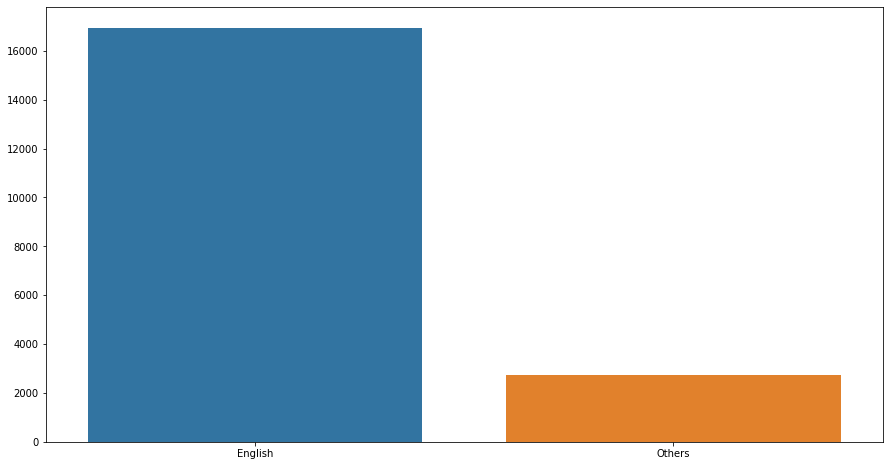

In [15]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='job_language', data=df)  
ax.set_xlabel('')
ax.set_ylabel('');

## Has Skills

In [16]:
df[['has_skills', 'job_has_skills', 'ignore_has_skills']] = [False, False, False]
df.loc[df['no_skills'] > 0, 'has_skills'] = True
df.loc[df['no_job_skills'] > 0, 'job_has_skills'] = True
df.loc[df['no_ignore_skills'] > 0, 'ignore_has_skills'] = True
df[['has_skills', 'job_has_skills', 'ignore_has_skills']].describe()

,has_skills,job_has_skills,ignore_has_skills
count,19680,19680,19680
unique,2,2,2
top,True,True,True
freq,16848,14331,13897


In [17]:
df[['has_skills', 'job_has_skills', 'ignore_has_skills']].value_counts(normalize=True) * 100

has_skills  job_has_skills  ignore_has_skills
True        True            True                 57.825203
                            False                14.994919
False       False           False                14.390244
True        False           True                 12.789634
dtype: float64

In [18]:
df['has_skills'].value_counts(normalize=True) * 100

True     85.609756
False    14.390244
Name: has_skills, dtype: float64

In [19]:
df['job_has_skills'].value_counts(normalize=True) * 100

True     72.820122
False    27.179878
Name: job_has_skills, dtype: float64

In [20]:
df['ignore_has_skills'].value_counts(normalize=True) * 100

True     70.614837
False    29.385163
Name: ignore_has_skills, dtype: float64

## Number of Skills

In [21]:
df[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe()

,no_skills,no_job_skills,no_ignore_skills
count,19680.000000,19680.000000,19680.000000
mean,5.710671,3.518902,2.191768
std,7.273118,4.920729,2.687912
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,7.000000,5.000000,3.000000
max,72.000000,53.000000,20.000000


### All Skills

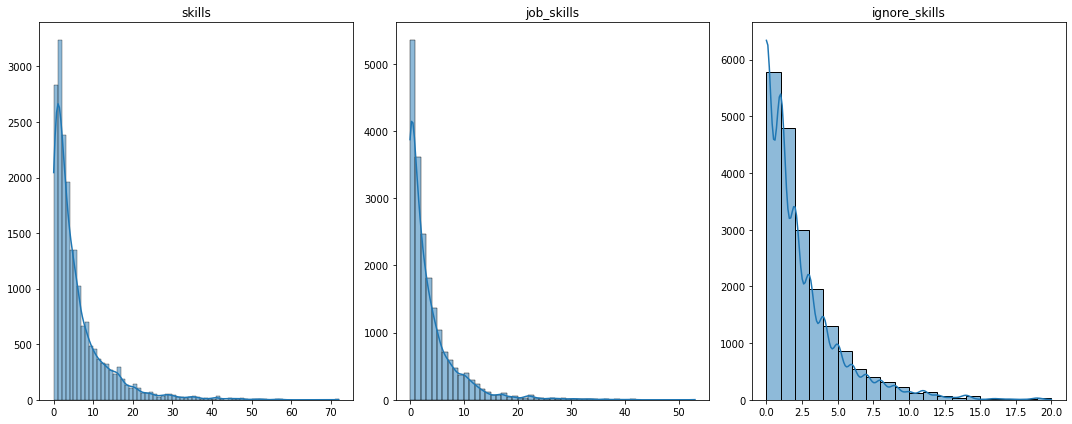

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df, kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

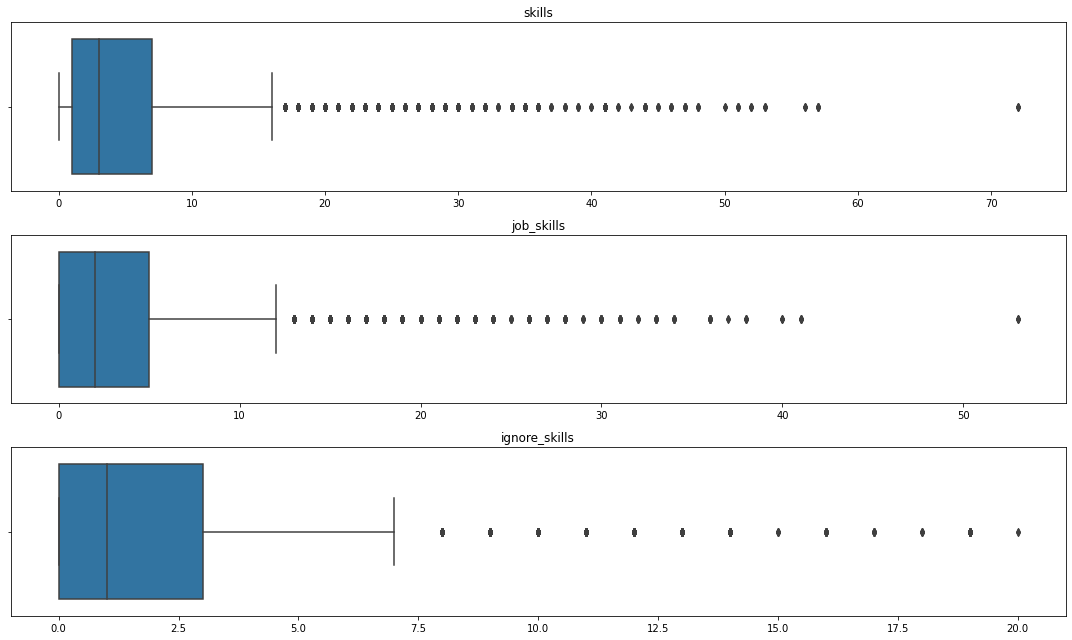

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df, ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

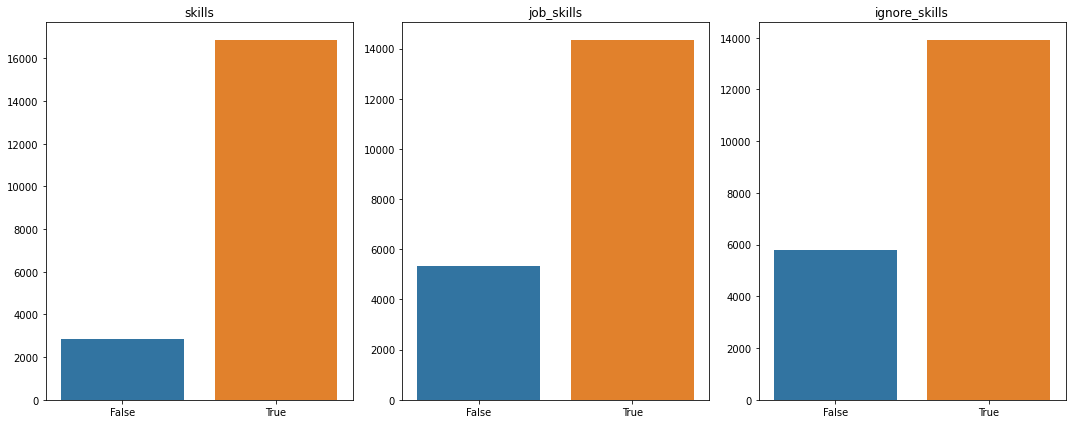

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df, ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

### Job Skills

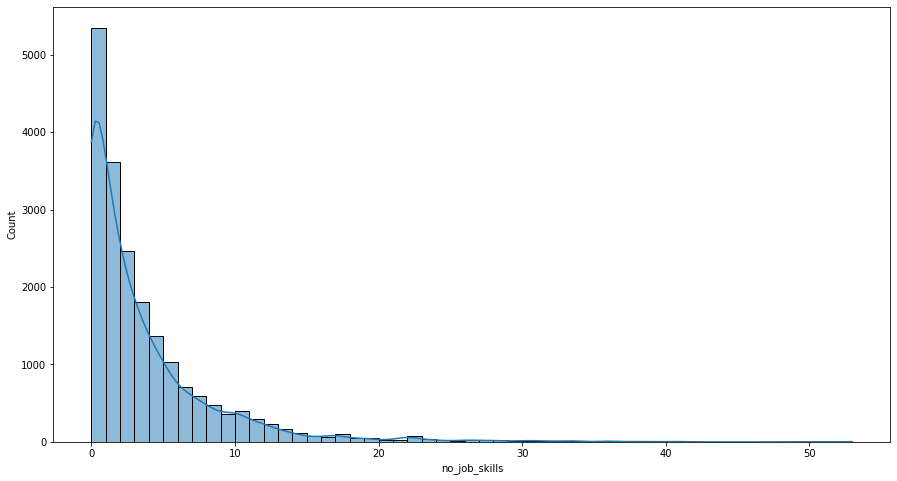

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(x='no_job_skills', data=df, kde=True, binwidth=1);

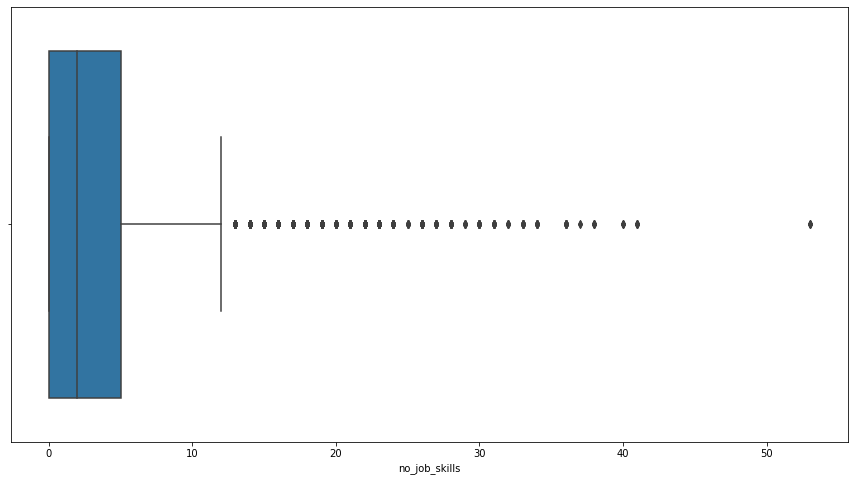

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='no_job_skills', data=df);

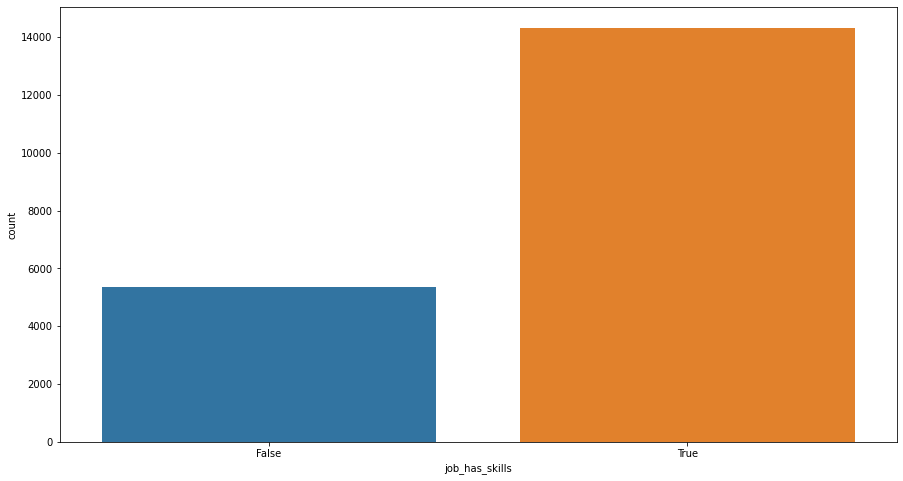

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_has_skills', data=df);

## Skills

In [28]:
def get_skill_count(df, field):
    skill_dict = {}
    for _, row in df.iterrows():
        if field == 'skills':
            skills = row[field].lstrip('[').rstrip(']').split(', ')
        else:
            try:
                skills = row[field].split('; ')
            except:
                continue
        if len(skills) > 0:
            for skill in skills:
                if field == 'skills':
                    skill = skill.strip("'")
                if skill == '':
                    continue
                if skill in skill_dict.keys():
                    skill_dict[skill] += 1
                else:
                    skill_dict[skill] = 1
    df = pd.DataFrame.from_dict(skill_dict, orient='index', columns=['count']).reset_index().sort_values(by='count', ascending=False)
    return df

In [29]:
df_all = get_skill_count(df, 'skills')
print(len(df_all))
df_all.head()

978


,index,count
2,Service,3480
0,Product,3432
13,Management,3294
1,Sales,2624
4,Operations,2544


In [30]:
df_job = get_skill_count(df, 'job_skills')
print(len(df_job))
df_job.head()

934


,index,count
0,Sales,2580
7,Communication,2151
28,English,1932
8,Management,1893
9,Training,1398


In [31]:
df_ignore = get_skill_count(df, 'ignore_skills')
print(len(df_ignore))
df_ignore.head()

139


,index,count
1,Service,3480
0,Product,3432
2,Operations,2544
8,Support,2530
6,Production,1940


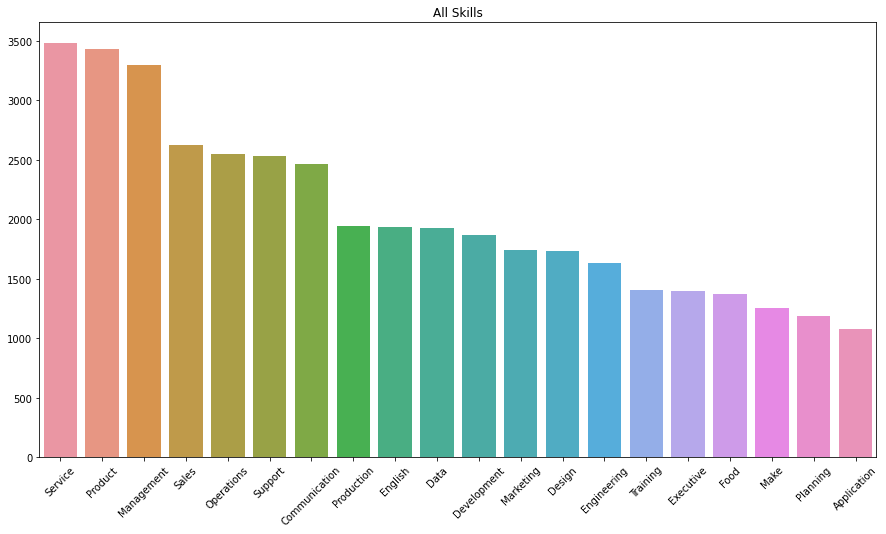

In [32]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=df_all.iloc[:20])
plt.xticks(rotation=45)
ax.set_title('All Skills')
ax.set_xlabel('')
ax.set_ylabel('');

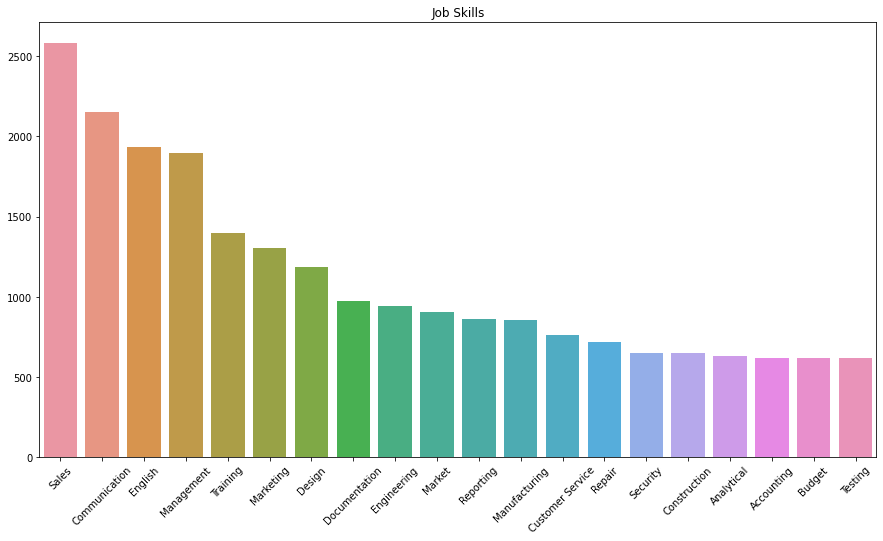

In [33]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=df_job.iloc[:20])
plt.xticks(rotation=45)
ax.set_title('Job Skills')
ax.set_xlabel('')
ax.set_ylabel('');

# Education Analysis

## Language

In [34]:
df.groupby('education')['job_language'].value_counts()

education                job_language
1 - Primary Education    English          623
                         Others           118
2 - PMR / PT3            English         1153
                         Others           203
3 - SPM / O Level / SKM  English         6955
                         Others          1110
4 - STPM / A Level       English          387
                         Others            73
5 - Diploma / DVM        English         4257
                         Others           684
6 - Bachelor's           English         3441
                         Others           521
7 - Master's             English           83
                         Others            13
8 - Doctoral (PhD)       English           51
                         Others             8
Name: job_language, dtype: int64

In [35]:
df.groupby('education')['job_language'].value_counts(normalize=True) * 100

education                job_language
1 - Primary Education    English         84.075574
                         Others          15.924426
2 - PMR / PT3            English         85.029499
                         Others          14.970501
3 - SPM / O Level / SKM  English         86.236826
                         Others          13.763174
4 - STPM / A Level       English         84.130435
                         Others          15.869565
5 - Diploma / DVM        English         86.156648
                         Others          13.843352
6 - Bachelor's           English         86.850076
                         Others          13.149924
7 - Master's             English         86.458333
                         Others          13.541667
8 - Doctoral (PhD)       English         86.440678
                         Others          13.559322
Name: job_language, dtype: float64

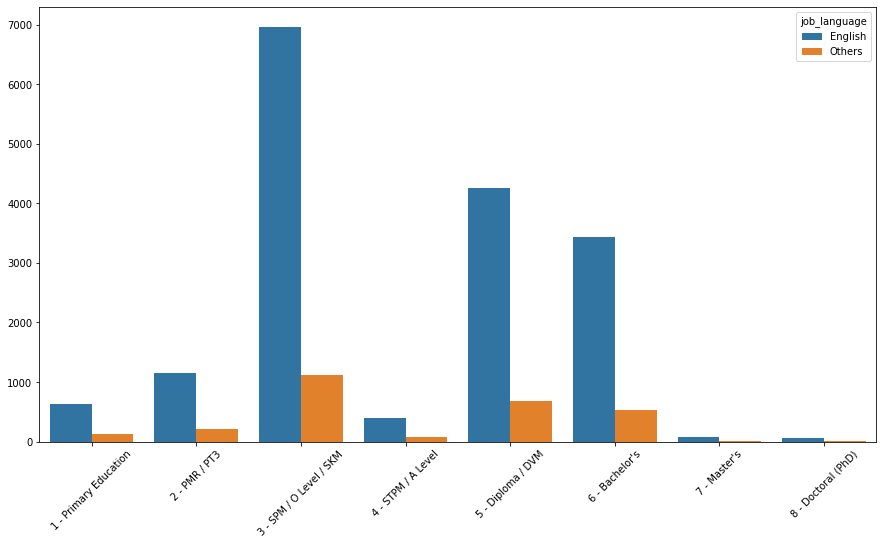

In [36]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', hue='job_language', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Has Skills

In [37]:
df.groupby('education')[['has_skills', 'job_has_skills', 'ignore_has_skills']].describe()

has_skills                    job_has_skills         \
                             count unique   top  freq          count unique   
education                                                                     
1 - Primary Education          741      2  True   618            741      2   
2 - PMR / PT3                 1356      2  True  1162           1356      2   
3 - SPM / O Level / SKM       8065      2  True  6880           8065      2   
4 - STPM / A Level             460      2  True   377            460      2   
5 - Diploma / DVM             4941      2  True  4270           4941      2   
6 - Bachelor's                3962      2  True  3409           3962      2   
7 - Master's                    96      2  True    82             96      2   
8 - Doctoral (PhD)              59      2  True    50             59      2   

                                    ignore_has_skills                     
                          top  freq             count unique   top  freq  
education                                                                 
1 - Primary Education    True   514               741      2  True   501  
2 - PMR / PT3            True   999              1356      2  True   947  
3 - SPM / O Level / SKM  True  5809              8065      2  True  5693  
4 - STPM / A Level       True   326               460      2  True   312  
5 - Diploma / DVM        True  3656              4941      2  True  3537  
6 - Bachelor's           True  2917              3962      2  True  2799  
7 - Master's             True    71                96      2  True    66  
8 - Doctoral (PhD)       True    39                59      2  True    42

In [38]:
df.groupby('education')['has_skills'].value_counts(normalize=True) * 100

education                has_skills
1 - Primary Education    True          83.400810
                         False         16.599190
2 - PMR / PT3            True          85.693215
                         False         14.306785
3 - SPM / O Level / SKM  True          85.306882
                         False         14.693118
4 - STPM / A Level       True          81.956522
                         False         18.043478
5 - Diploma / DVM        True          86.419753
                         False         13.580247
6 - Bachelor's           True          86.042403
                         False         13.957597
7 - Master's             True          85.416667
                         False         14.583333
8 - Doctoral (PhD)       True          84.745763
                         False         15.254237
Name: has_skills, dtype: float64

In [39]:
df.groupby('education')['job_has_skills'].value_counts(normalize=True) * 100

education                job_has_skills
1 - Primary Education    True              69.365722
                         False             30.634278
2 - PMR / PT3            True              73.672566
                         False             26.327434
3 - SPM / O Level / SKM  True              72.027278
                         False             27.972722
4 - STPM / A Level       True              70.869565
                         False             29.130435
5 - Diploma / DVM        True              73.993119
                         False             26.006881
6 - Bachelor's           True              73.624432
                         False             26.375568
7 - Master's             True              73.958333
                         False             26.041667
8 - Doctoral (PhD)       True              66.101695
                         False             33.898305
Name: job_has_skills, dtype: float64

In [40]:
df.groupby('education')['ignore_has_skills'].value_counts(normalize=True) * 100

education                ignore_has_skills
1 - Primary Education    True                 67.611336
                         False                32.388664
2 - PMR / PT3            True                 69.837758
                         False                30.162242
3 - SPM / O Level / SKM  True                 70.588965
                         False                29.411035
4 - STPM / A Level       True                 67.826087
                         False                32.173913
5 - Diploma / DVM        True                 71.584699
                         False                28.415301
6 - Bachelor's           True                 70.646138
                         False                29.353862
7 - Master's             True                 68.750000
                         False                31.250000
8 - Doctoral (PhD)       True                 71.186441
                         False                28.813559
Name: ignore_has_skills, dtype: float64

## Number of Skills

In [41]:
df.groupby('education')['no_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1 - Primary Education,741.0,5.256410,7.090466,0.0,1.0,3.0,6.0,52.0
2 - PMR / PT3,1356.0,5.376844,6.633941,0.0,1.0,3.0,7.0,56.0
3 - SPM / O Level / SKM,8065.0,5.681339,7.252147,0.0,1.0,3.0,8.0,72.0
4 - STPM / A Level,460.0,5.671739,7.218868,0.0,1.0,3.0,7.0,41.0
5 - Diploma / DVM,4941.0,5.746408,7.254361,0.0,1.0,3.0,7.0,72.0
6 - Bachelor's,3962.0,5.957345,7.588804,0.0,1.0,3.0,8.0,72.0
7 - Master's,96.0,5.010417,7.284439,0.0,1.0,3.0,6.0,45.0
8 - Doctoral (PhD),59.0,4.983051,6.366647,0.0,1.0,3.0,5.0,30.0


In [42]:
df.groupby('education')['no_job_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1 - Primary Education,741.0,3.228070,4.742627,0.0,0.0,2.0,4.0,36.0
2 - PMR / PT3,1356.0,3.300147,4.500991,0.0,0.0,2.0,4.0,40.0
3 - SPM / O Level / SKM,8065.0,3.492002,4.912727,0.0,0.0,2.0,5.0,53.0
4 - STPM / A Level,460.0,3.582609,4.948066,0.0,0.0,2.0,5.0,30.0
5 - Diploma / DVM,4941.0,3.526816,4.881463,0.0,0.0,2.0,5.0,53.0
6 - Bachelor's,3962.0,3.704947,5.147020,0.0,0.0,2.0,5.0,53.0
7 - Master's,96.0,3.083333,5.252902,0.0,0.0,1.0,4.0,36.0
8 - Doctoral (PhD),59.0,2.932203,4.072043,0.0,0.0,2.0,3.5,16.0


In [43]:
df.groupby('education')['no_ignore_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1 - Primary Education,741.0,2.028340,2.658084,0.0,0.0,1.0,3.0,19.0
2 - PMR / PT3,1356.0,2.076696,2.492501,0.0,0.0,1.0,3.0,19.0
3 - SPM / O Level / SKM,8065.0,2.189337,2.675578,0.0,0.0,1.0,3.0,20.0
4 - STPM / A Level,460.0,2.089130,2.555419,0.0,0.0,1.0,3.0,14.0
5 - Diploma / DVM,4941.0,2.219591,2.714064,0.0,0.0,1.0,3.0,20.0
6 - Bachelor's,3962.0,2.252398,2.771424,0.0,0.0,1.0,3.0,19.0
7 - Master's,96.0,1.927083,2.354144,0.0,0.0,1.0,3.0,11.0
8 - Doctoral (PhD),59.0,2.050847,2.622343,0.0,0.0,1.0,3.0,14.0


### All Skills

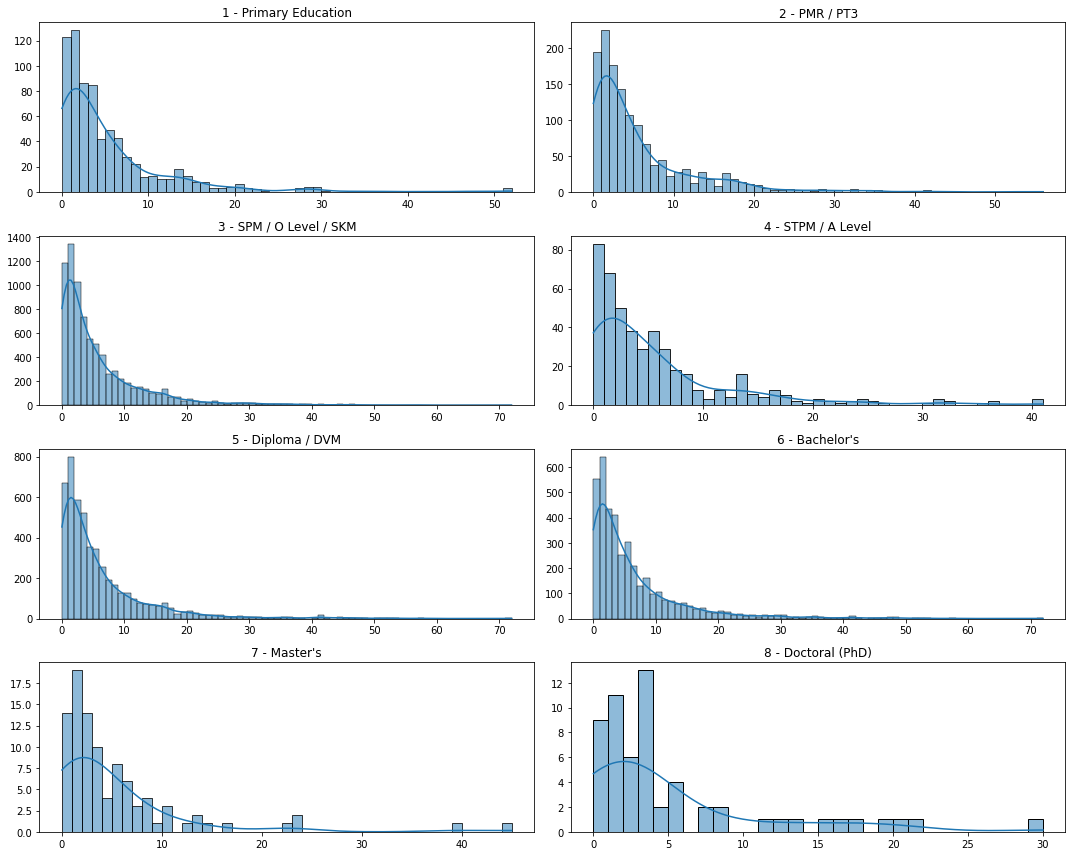

In [44]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_skills', data=df.loc[df['education'] == educations[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

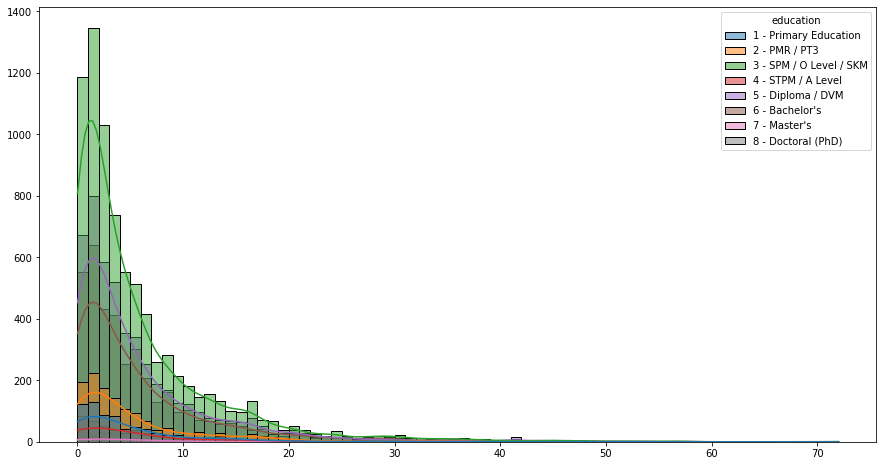

In [45]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_skills', hue='education', data=df, kde=True, binwidth=1, hue_order=educations)
ax.set_xlabel('')
ax.set_ylabel('');

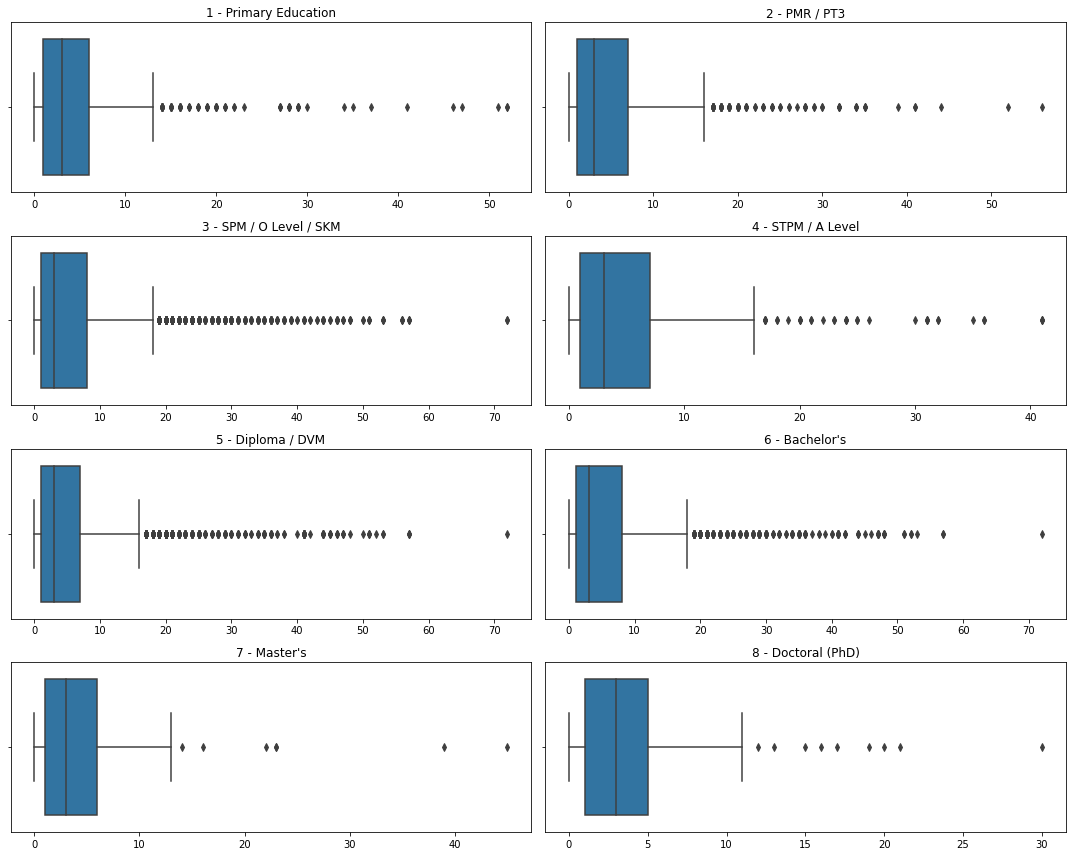

In [46]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_skills', data=df.loc[df['education'] == educations[i]], ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')

fig.tight_layout();

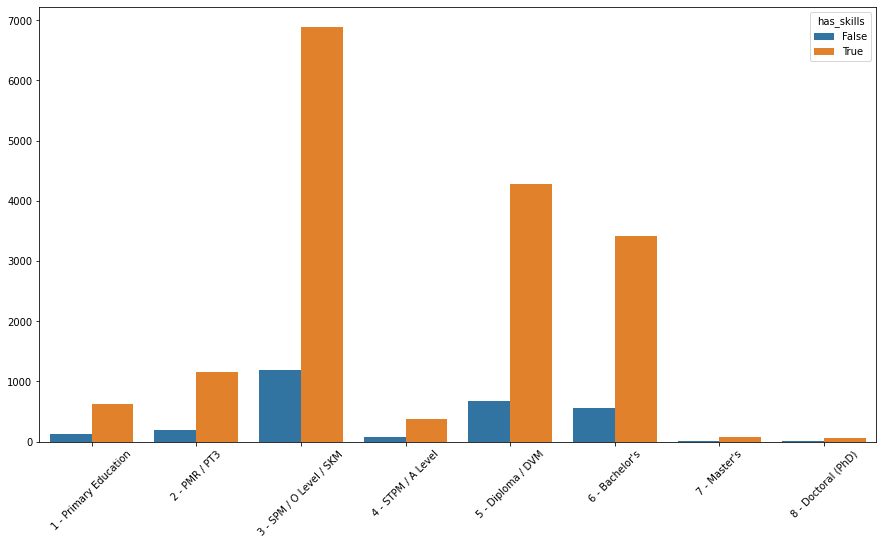

In [47]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', hue='has_skills', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

### Job Skills

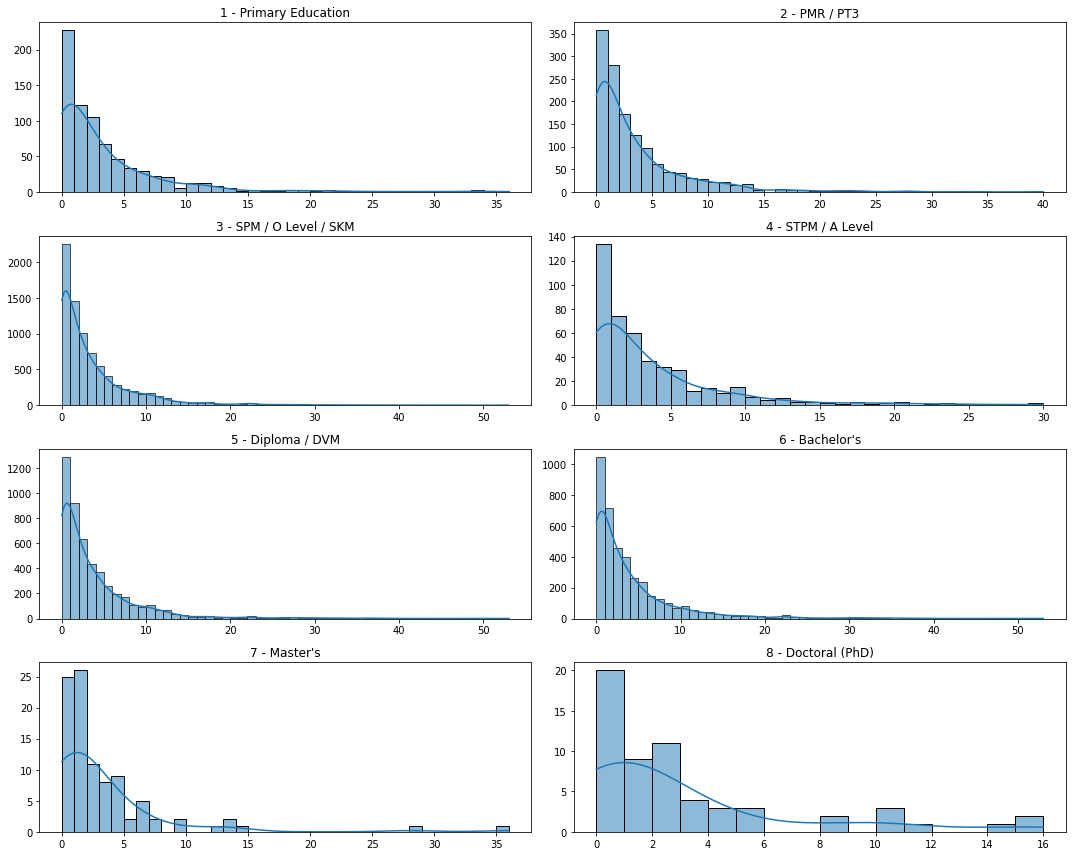

In [48]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_job_skills', data=df.loc[df['education'] == educations[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

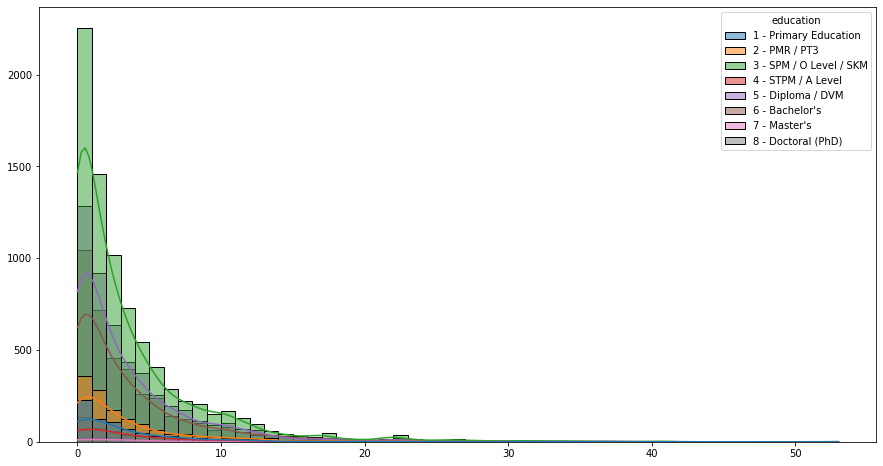

In [49]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_job_skills', hue='education', data=df, kde=True, binwidth=1, hue_order=educations)
ax.set_xlabel('')
ax.set_ylabel('');

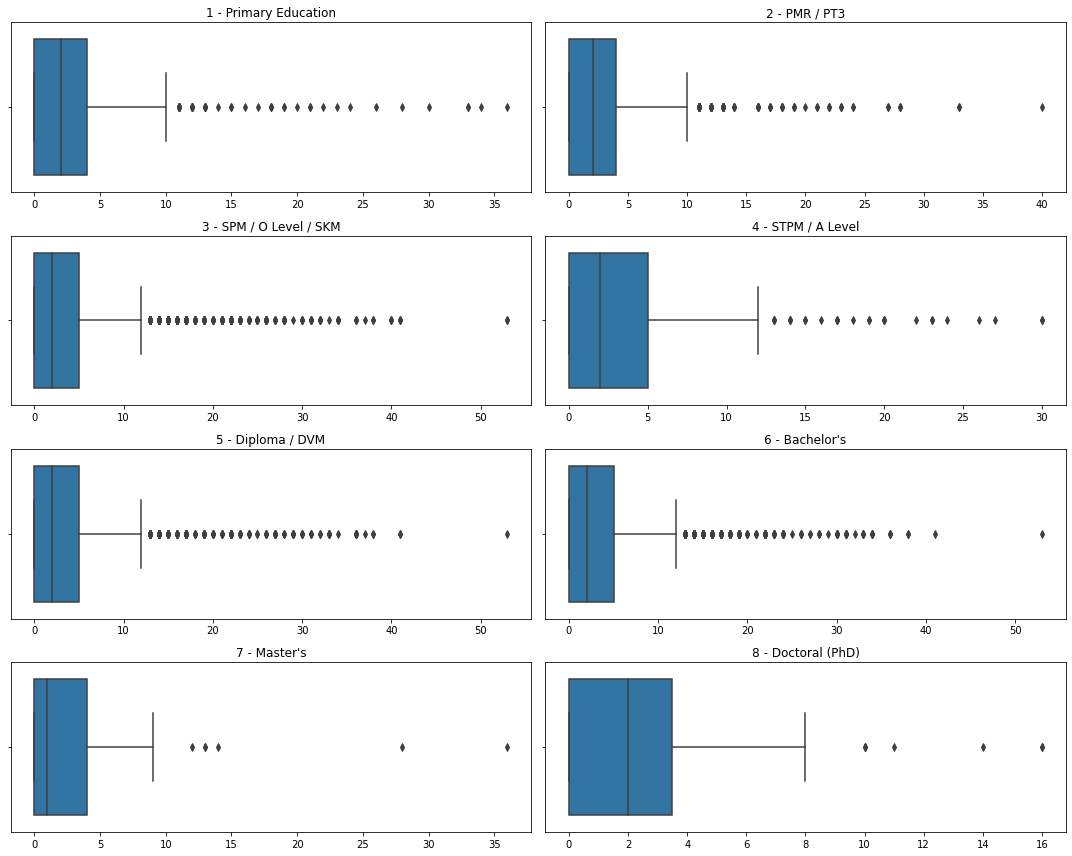

In [50]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_job_skills', data=df.loc[df['education'] == educations[i]], ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')

fig.tight_layout();

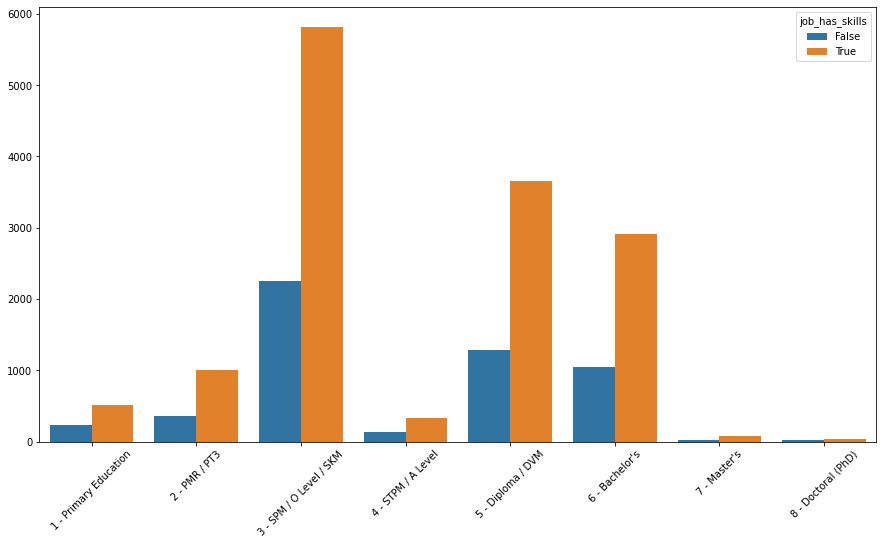

In [51]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', hue='job_has_skills', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Skills

### All Skills

In [52]:
edu_skills = {}

for edu in educations:
    edu_skills[edu] = get_skill_count(df.loc[df['education'] == edu], 'skills')

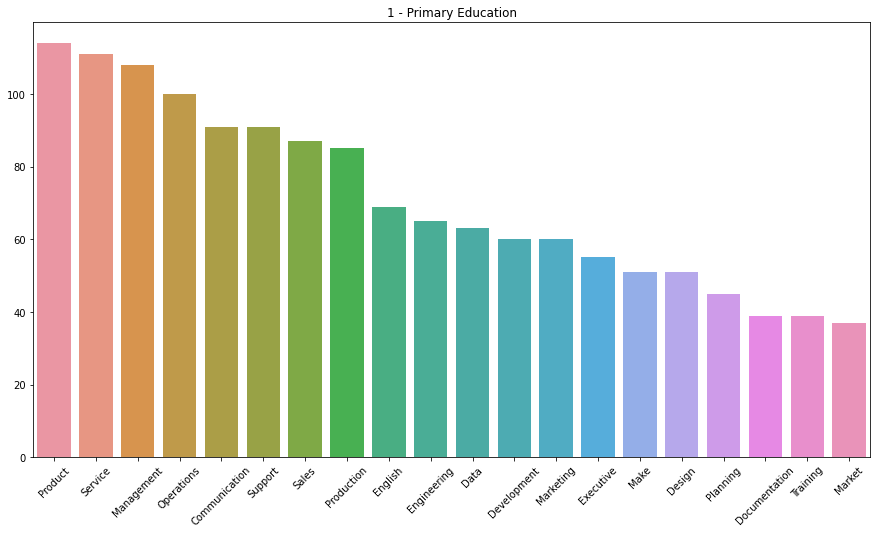

In [53]:
edu = educations[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

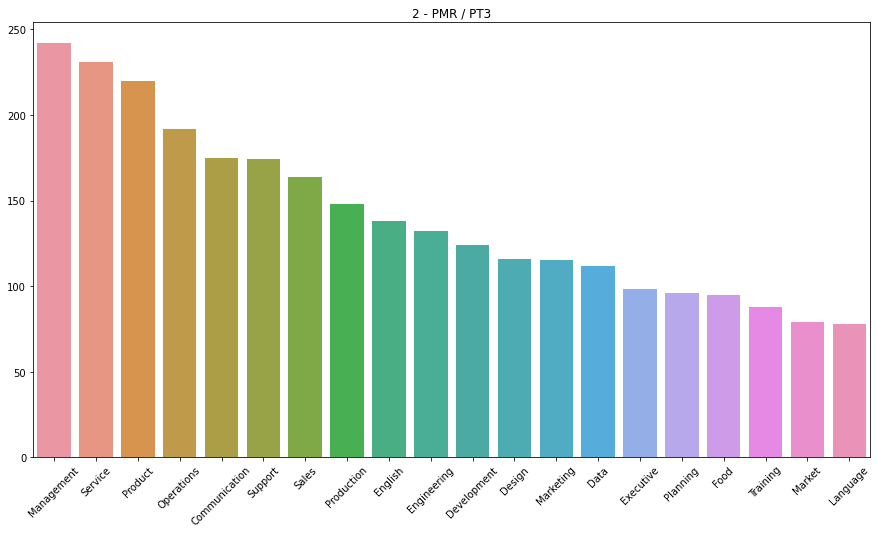

In [54]:
edu = educations[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

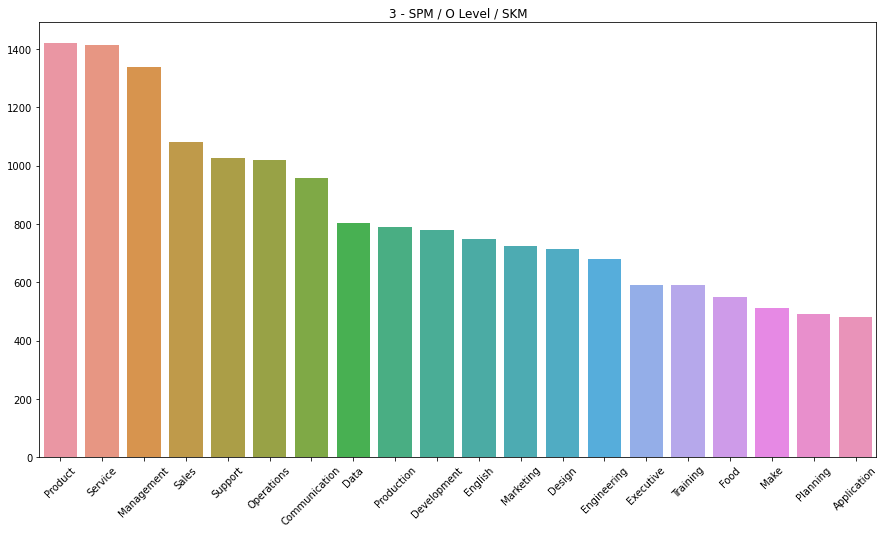

In [55]:
edu = educations[2]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

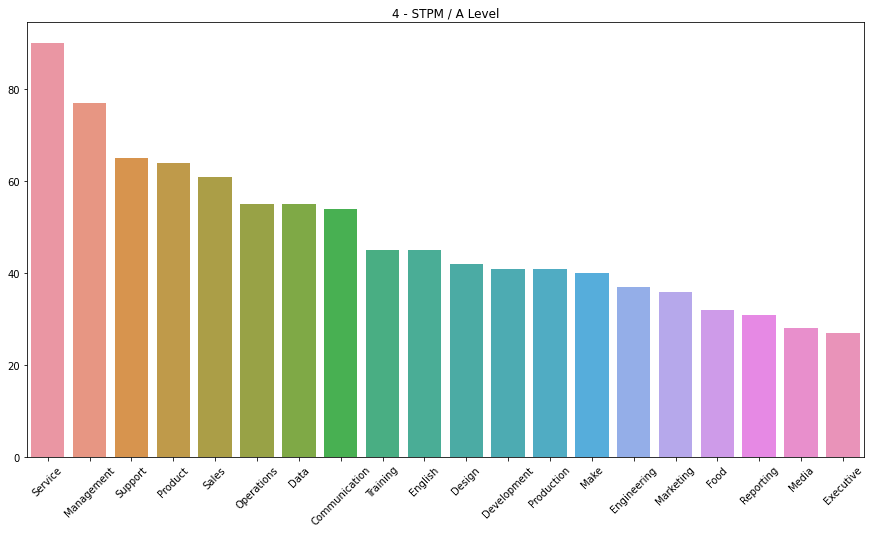

In [56]:
edu = educations[3]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

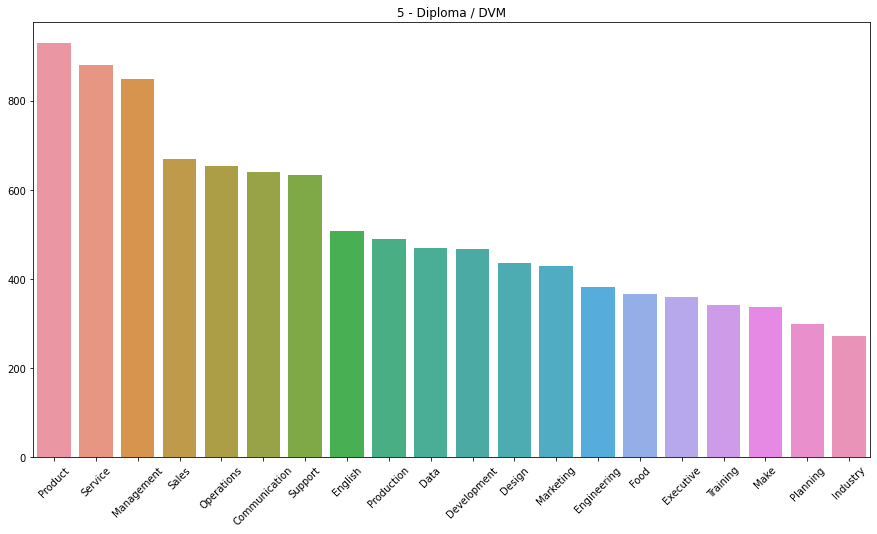

In [57]:
edu = educations[4]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

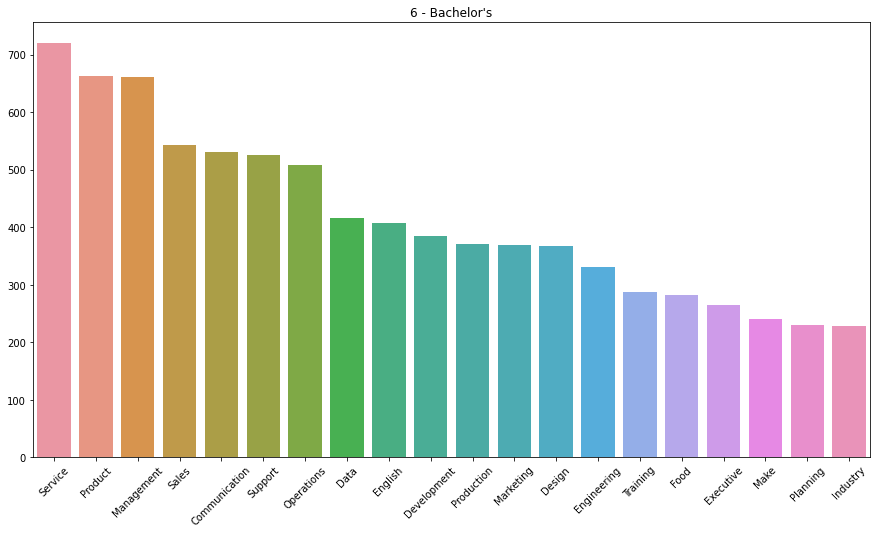

In [58]:
edu = educations[5]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

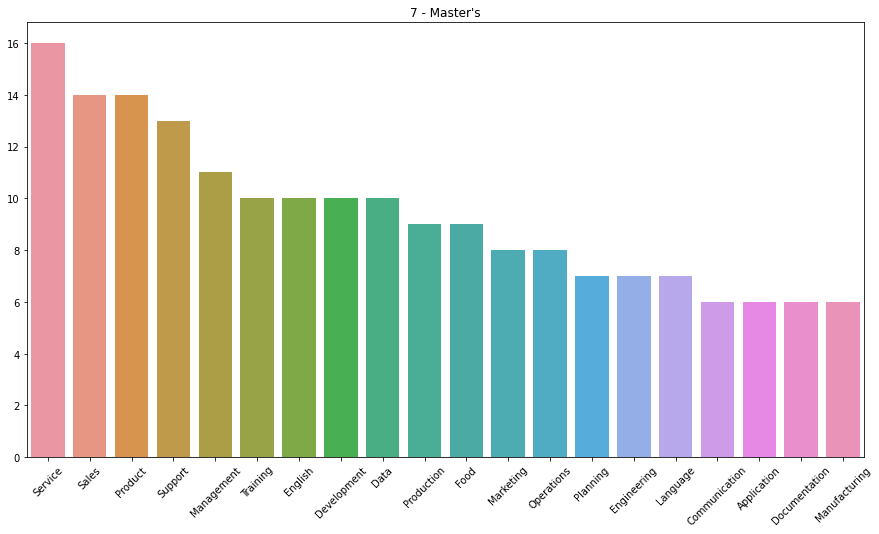

In [59]:
edu = educations[6]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

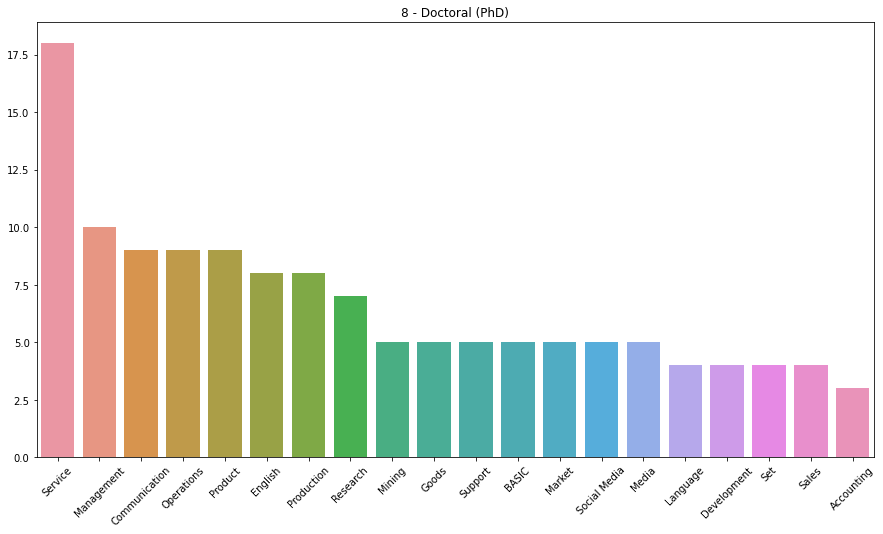

In [60]:
edu = educations[7]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

### Job Skills

In [61]:
edu_skills = {}

for edu in educations:
    edu_skills[edu] = get_skill_count(df.loc[df['education'] == edu], 'job_skills')

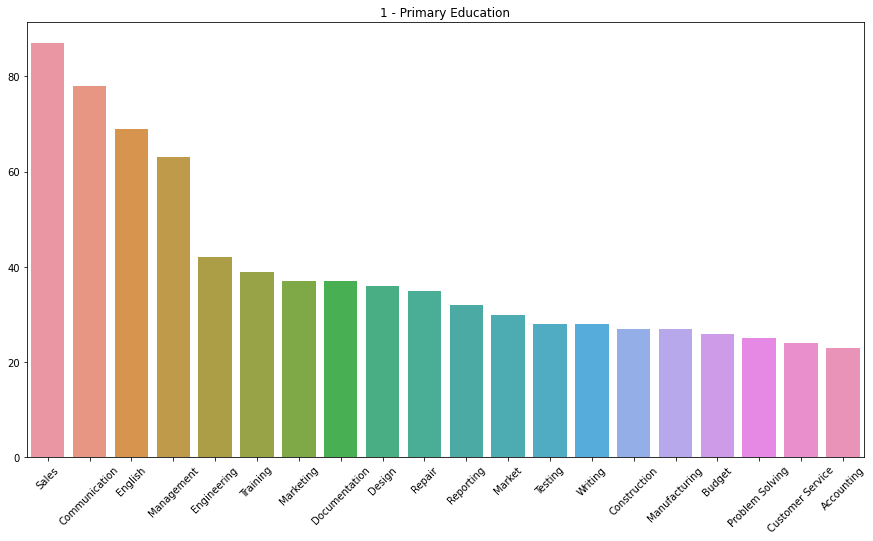

In [62]:
edu = educations[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

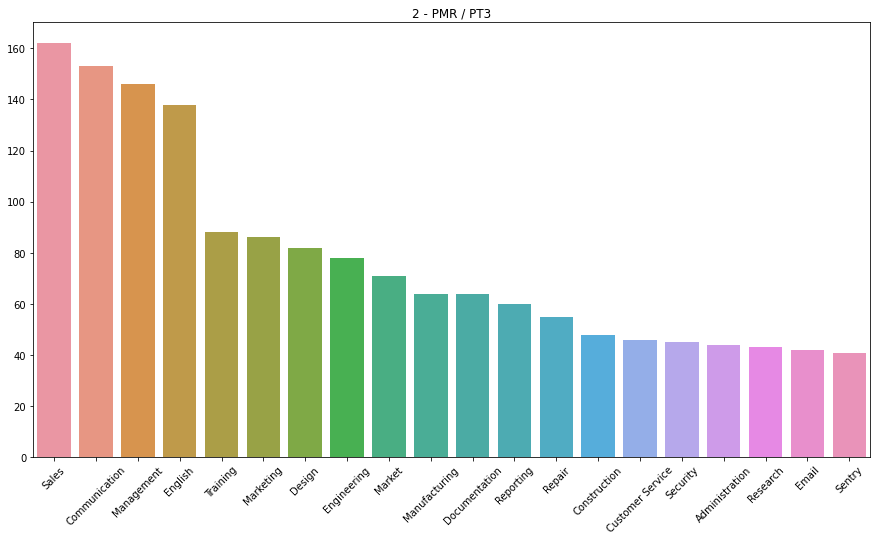

In [63]:
edu = educations[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

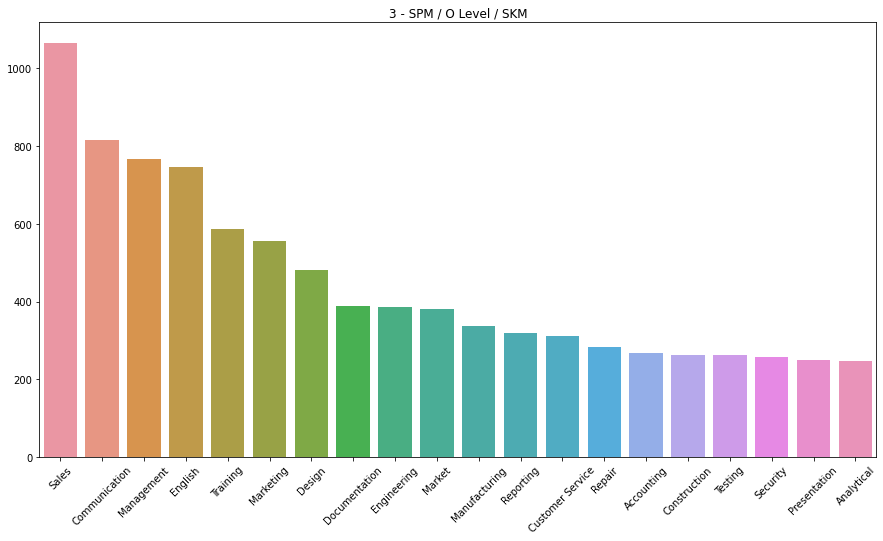

In [64]:
edu = educations[2]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

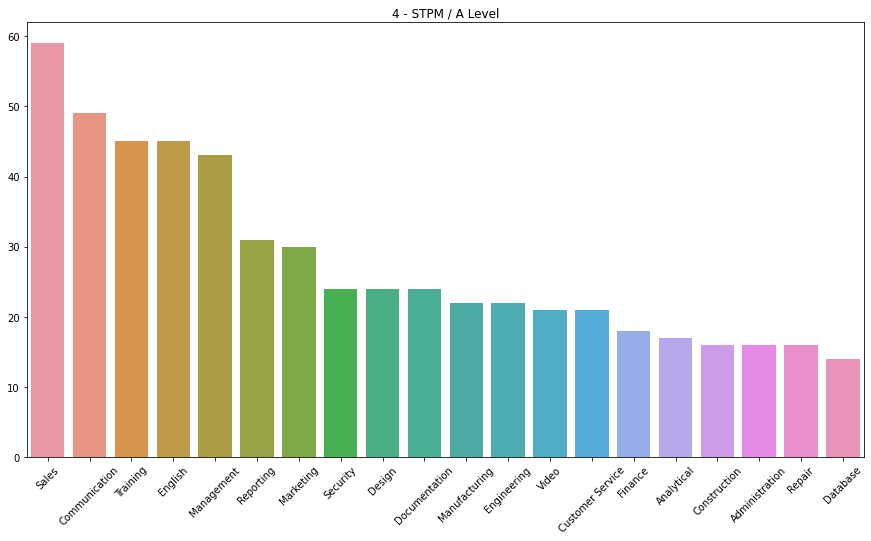

In [65]:
edu = educations[3]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

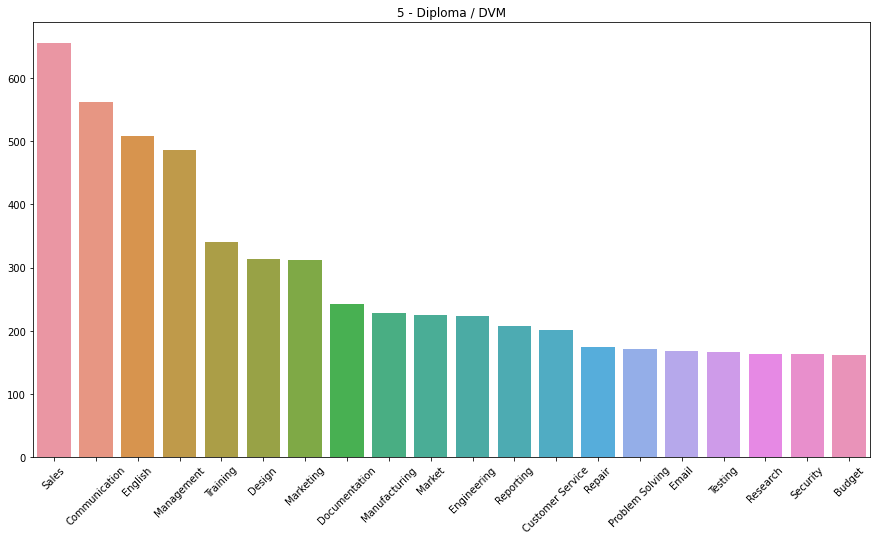

In [66]:
edu = educations[4]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

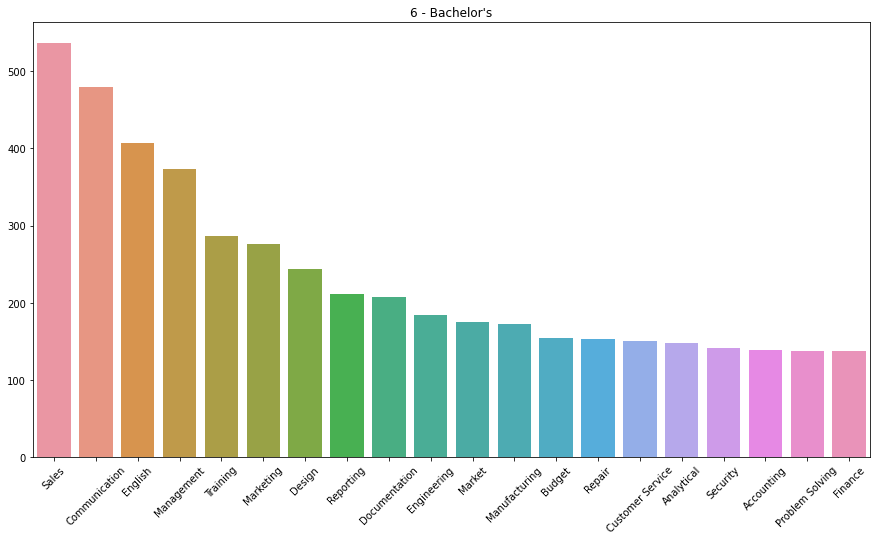

In [67]:
edu = educations[5]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

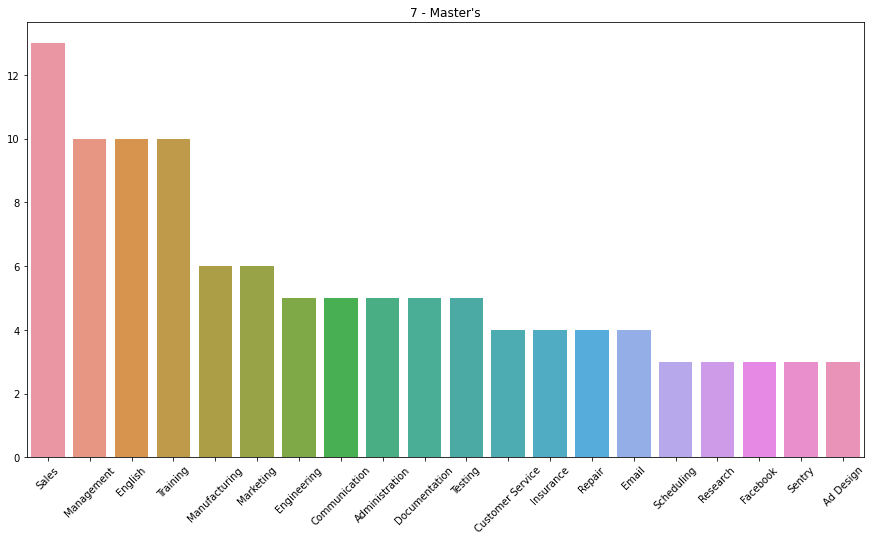

In [68]:
edu = educations[6]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

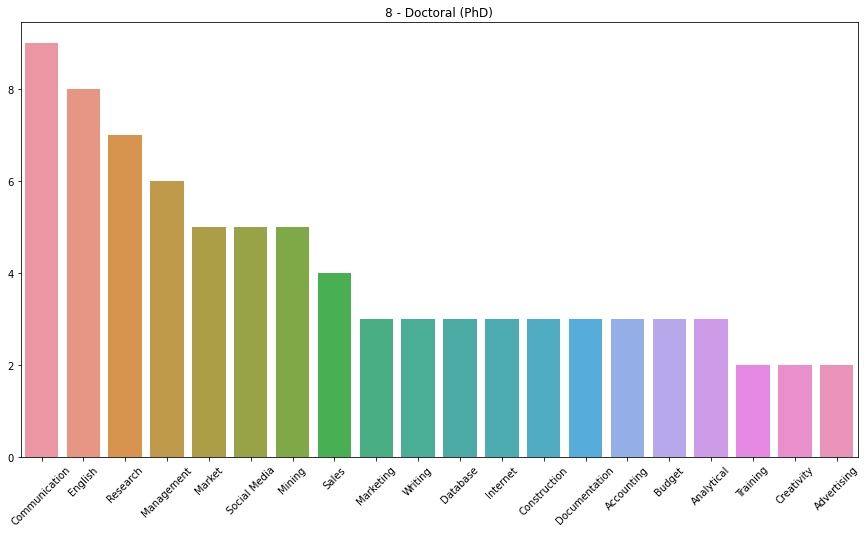

In [69]:
edu = educations[7]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

# Language Analysis

## Education

In [70]:
df.groupby('job_language')['education'].value_counts(normalize=True) * 100

job_language  education              
English       3 - SPM / O Level / SKM    41.032448
              5 - Diploma / DVM          25.115044
              6 - Bachelor's             20.300885
              2 - PMR / PT3               6.802360
              1 - Primary Education       3.675516
              4 - STPM / A Level          2.283186
              7 - Master's                0.489676
              8 - Doctoral (PhD)          0.300885
Others        3 - SPM / O Level / SKM    40.659341
              5 - Diploma / DVM          25.054945
              6 - Bachelor's             19.084249
              2 - PMR / PT3               7.435897
              1 - Primary Education       4.322344
              4 - STPM / A Level          2.673993
              7 - Master's                0.476190
              8 - Doctoral (PhD)          0.293040
Name: education, dtype: float64

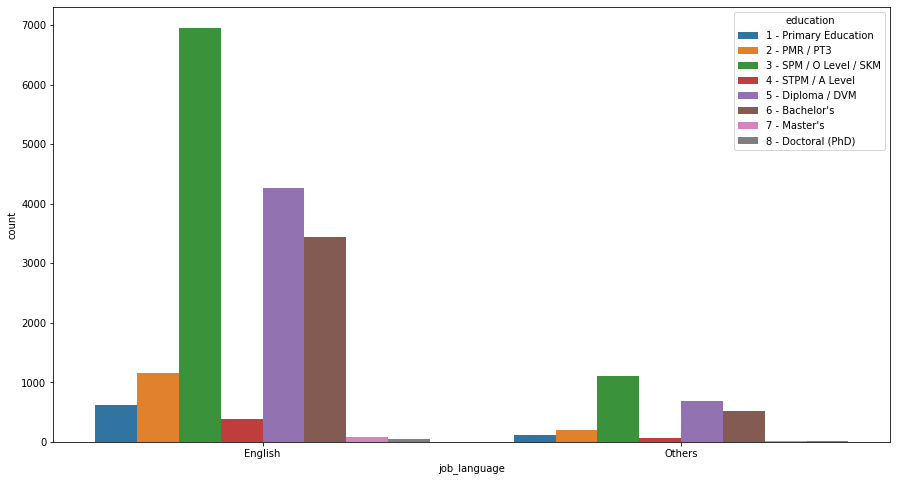

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_language', hue='education', data=df, hue_order=educations);

## Has Skills

In [72]:
df.groupby('job_language')[['has_skills', 'job_has_skills', 'ignore_has_skills']].describe()

has_skills                      job_has_skills                \
                  count unique    top   freq          count unique    top   
job_language                                                                
English           16950      2   True  15548          16950      2   True   
Others             2730      2  False   1430           2730      2  False   

                    ignore_has_skills                       
               freq             count unique    top   freq  
job_language                                                
English       13390             16950      2   True  13160  
Others         1789              2730      2  False   1993

In [73]:
df.groupby('job_language')['has_skills'].value_counts(normalize=True) * 100

job_language  has_skills
English       True          91.728614
              False          8.271386
Others        False         52.380952
              True          47.619048
Name: has_skills, dtype: float64

In [74]:
df.groupby('job_language')['job_has_skills'].value_counts(normalize=True) * 100

job_language  job_has_skills
English       True              78.997050
              False             21.002950
Others        False             65.531136
              True              34.468864
Name: job_has_skills, dtype: float64

In [75]:
df.groupby('job_language')['ignore_has_skills'].value_counts(normalize=True) * 100

job_language  ignore_has_skills
English       True                 77.640118
              False                22.359882
Others        False                73.003663
              True                 26.996337
Name: ignore_has_skills, dtype: float64

## Number of Skills

In [76]:
df.groupby('job_language')['no_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
job_language,,,,,,,,
English,16950.0,6.485015,7.534677,0.0,2.0,4.0,8.0,72.0
Others,2730.0,0.902930,1.419809,0.0,0.0,0.0,1.0,12.0


In [77]:
df.groupby('job_language')['no_job_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
job_language,,,,,,,,
English,16950.0,3.998702,5.128337,0.0,1.0,2.0,5.0,53.0
Others,2730.0,0.539927,0.978731,0.0,0.0,0.0,1.0,7.0


In [78]:
df.groupby('job_language')['no_ignore_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
job_language,,,,,,,,
English,16950.0,2.486313,2.772048,0.0,1.0,2.0,3.0,20.0
Others,2730.0,0.363004,0.700014,0.0,0.0,0.0,1.0,6.0


### All Skills

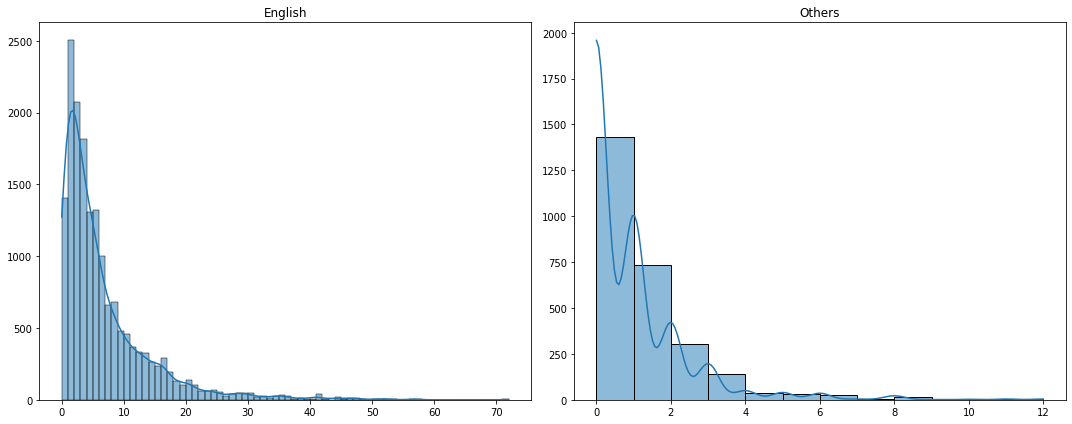

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_skills', data=df.loc[df['job_language'] == languages[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

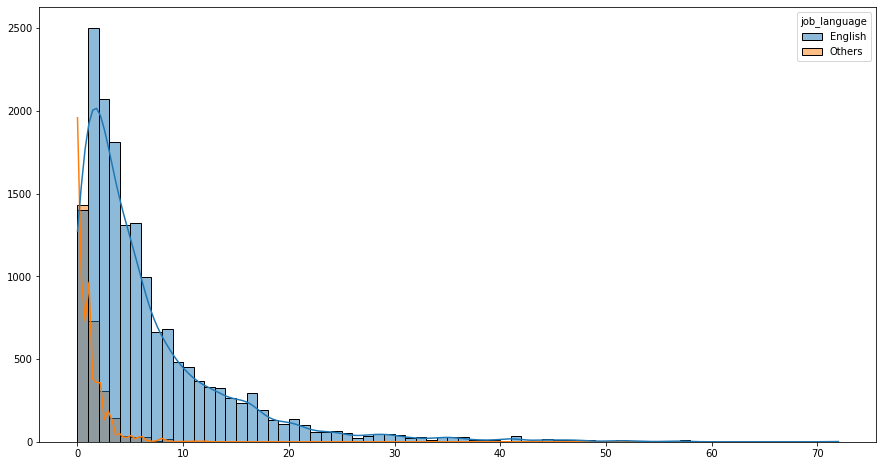

In [80]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_skills', hue='job_language', data=df, kde=True, binwidth=1, hue_order=languages)
ax.set_xlabel('')
ax.set_ylabel('');

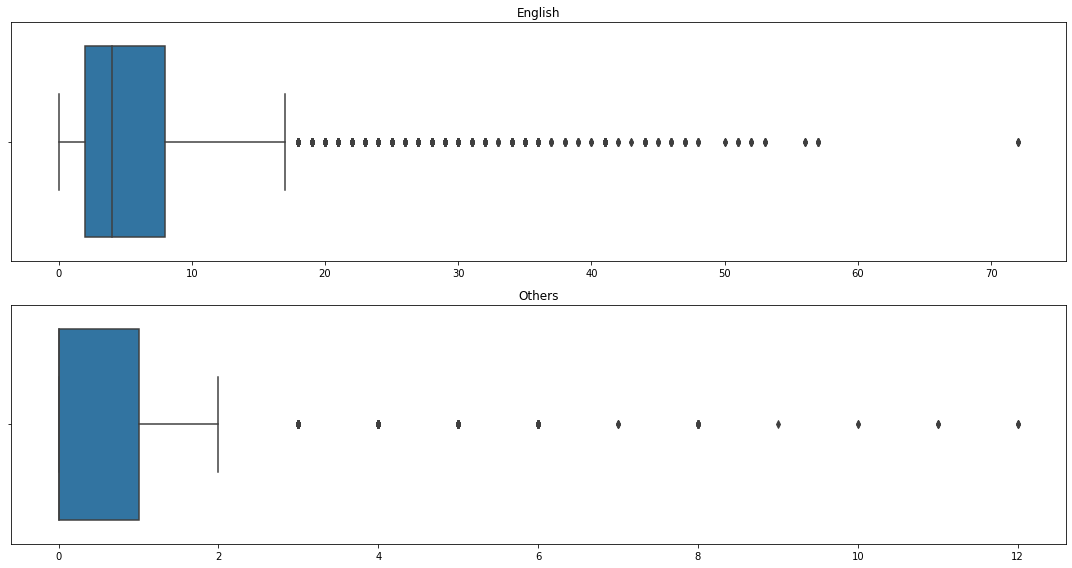

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_skills', data=df.loc[df['job_language'] == languages[i]], ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

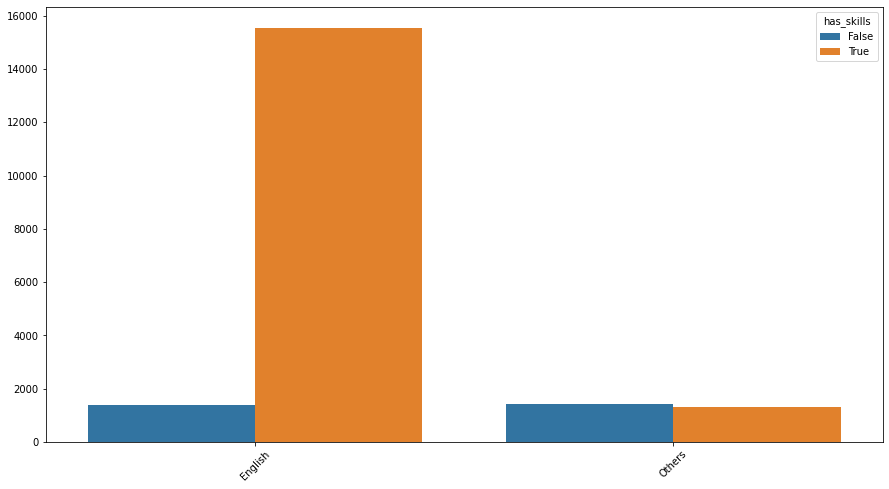

In [82]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='job_language', hue='has_skills', data=df, order=languages)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

### Job Skills

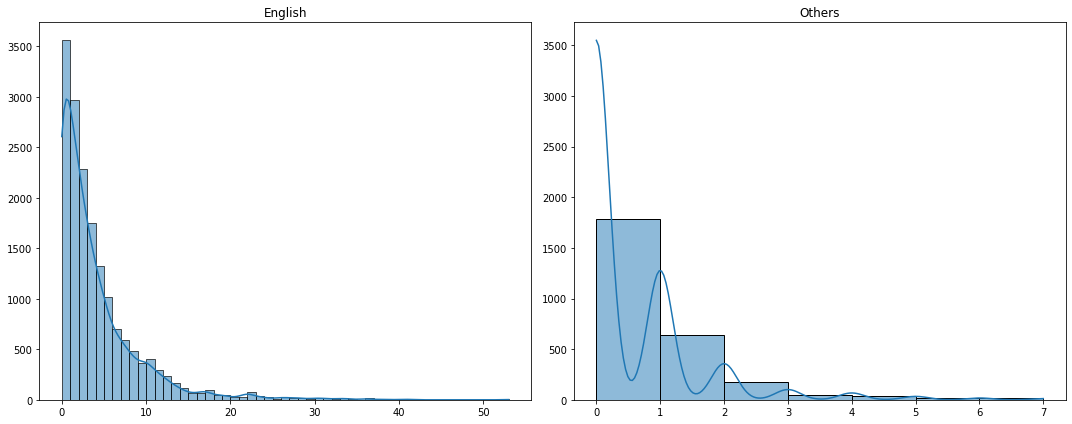

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_job_skills', data=df.loc[df['job_language'] == languages[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

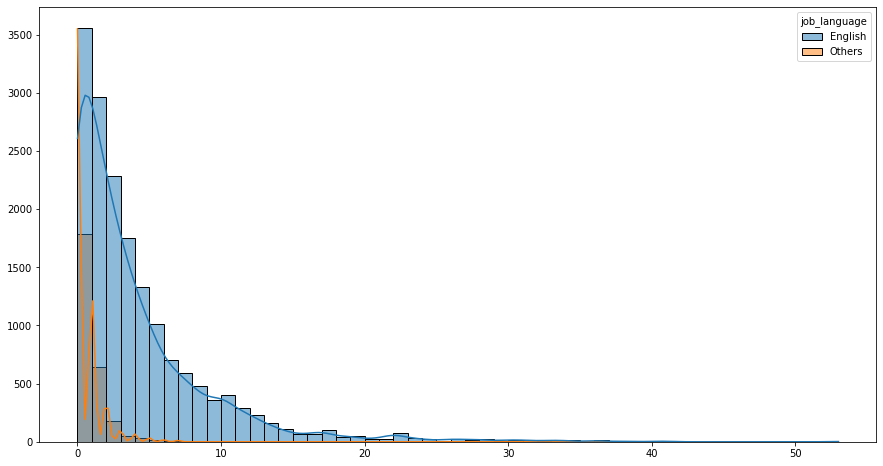

In [84]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_job_skills', hue='job_language', data=df, kde=True, binwidth=1, hue_order=languages)
ax.set_xlabel('')
ax.set_ylabel('');

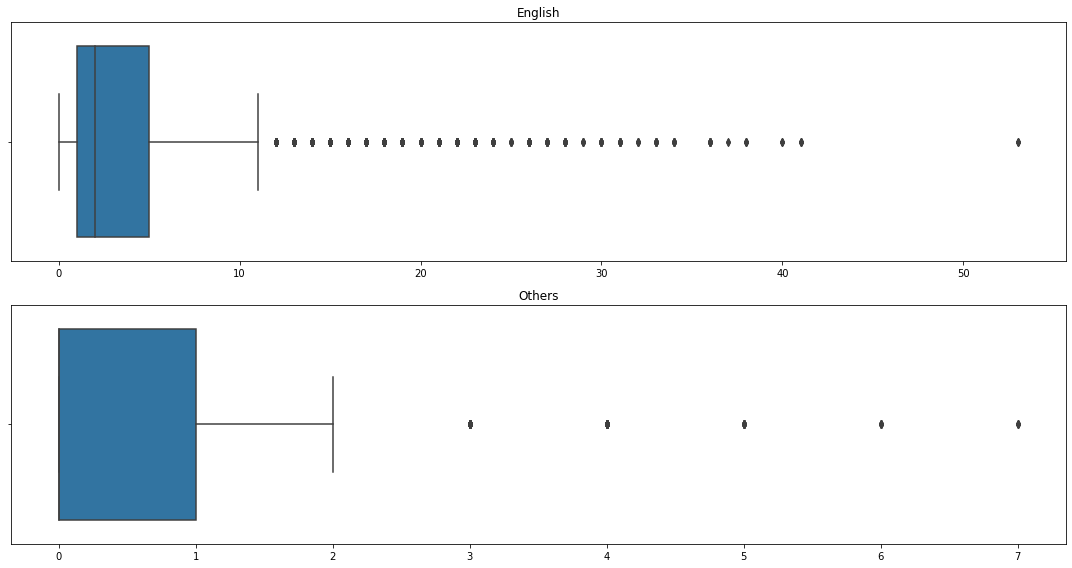

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_job_skills', data=df.loc[df['job_language'] == languages[i]], ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

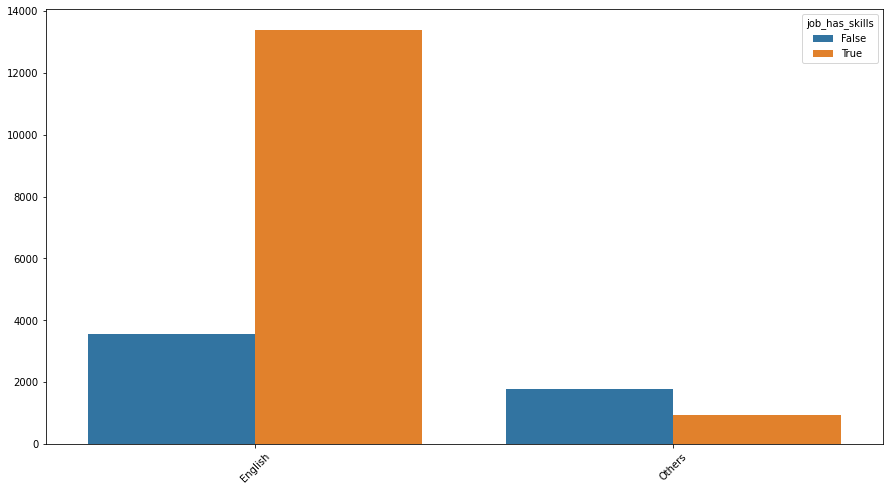

In [86]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='job_language', hue='job_has_skills', data=df, order=languages)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Skills

### All Skills

In [87]:
lan_skills = {}

for lan in languages:
    lan_skills[lan] = get_skill_count(df.loc[df['job_language'] == lan], 'skills')

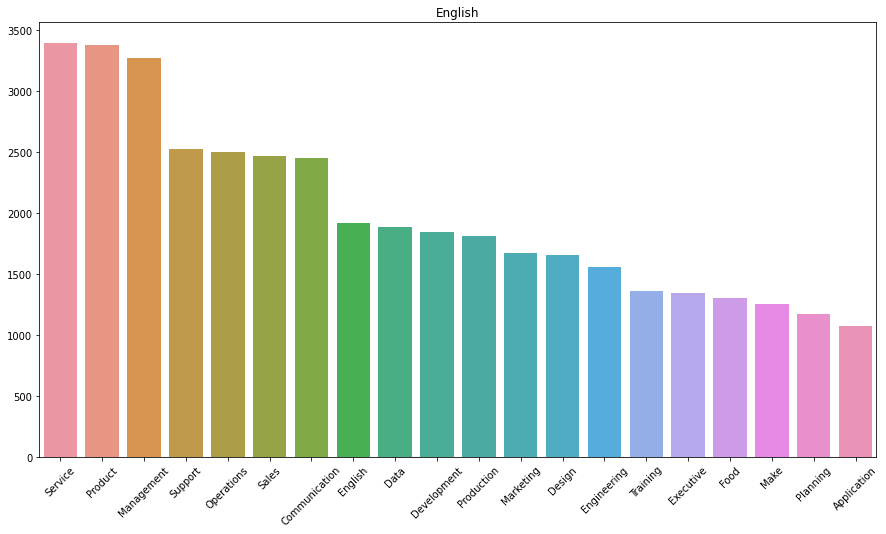

In [88]:
lan = languages[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

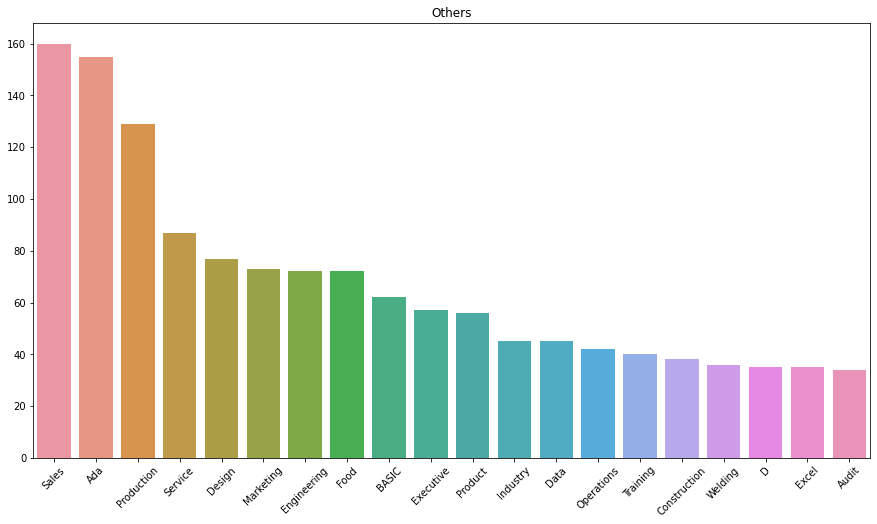

In [89]:
lan = languages[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

### Job Skills

In [90]:
lan_skills = {}

for lan in languages:
    lan_skills[lan] = get_skill_count(df.loc[df['job_language'] == lan], 'job_skills')

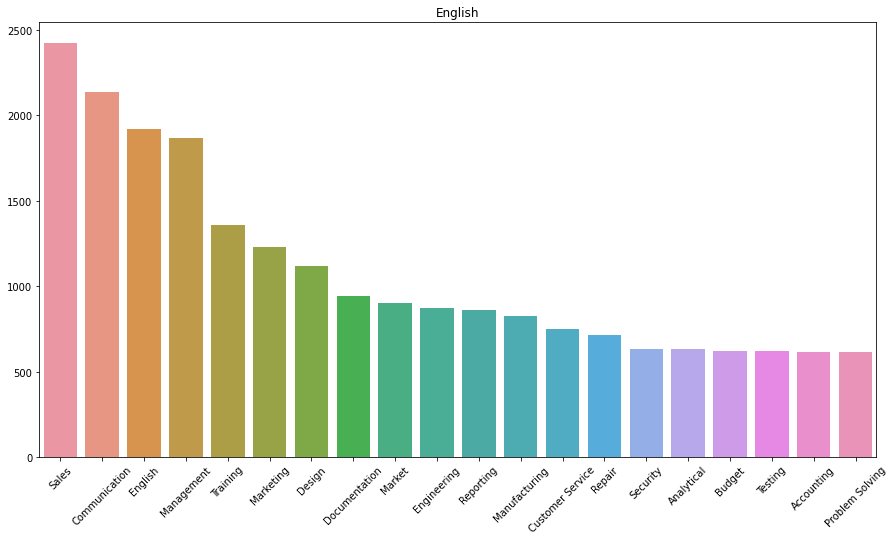

In [91]:
lan = languages[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

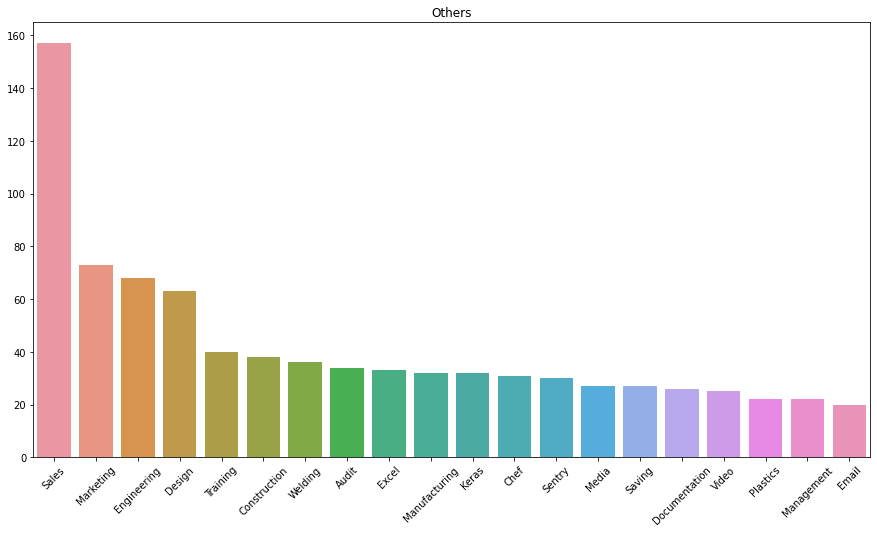

In [92]:
lan = languages[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

# Has Skill Analysis

## Education

### All Skills

In [93]:
df.groupby('has_skills')['education'].value_counts(normalize=True) * 100

has_skills  education              
False       3 - SPM / O Level / SKM    41.843220
            5 - Diploma / DVM          23.693503
            6 - Bachelor's             19.526836
            2 - PMR / PT3               6.850282
            1 - Primary Education       4.343220
            4 - STPM / A Level          2.930791
            7 - Master's                0.494350
            8 - Doctoral (PhD)          0.317797
True        3 - SPM / O Level / SKM    40.835708
            5 - Diploma / DVM          25.344255
            6 - Bachelor's             20.233856
            2 - PMR / PT3               6.896961
            1 - Primary Education       3.668091
            4 - STPM / A Level          2.237654
            7 - Master's                0.486705
            8 - Doctoral (PhD)          0.296771
Name: education, dtype: float64

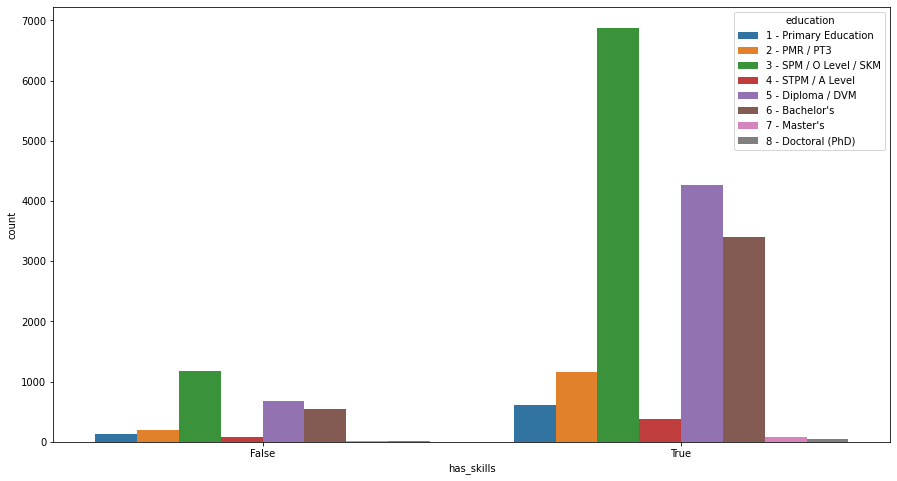

In [94]:
plt.figure(figsize=(15,8))
sns.countplot(x='has_skills', hue='education', data=df, hue_order=educations);

### Job Skills

In [95]:
df.groupby('job_has_skills')['education'].value_counts(normalize=True) * 100

job_has_skills  education              
False           3 - SPM / O Level / SKM    42.176108
                5 - Diploma / DVM          24.023182
                6 - Bachelor's             19.536362
                2 - PMR / PT3               6.674145
                1 - Primary Education       4.243784
                4 - STPM / A Level          2.505141
                7 - Master's                0.467377
                8 - Doctoral (PhD)          0.373902
True            3 - SPM / O Level / SKM    40.534506
                5 - Diploma / DVM          25.511130
                6 - Bachelor's             20.354476
                2 - PMR / PT3               6.970902
                1 - Primary Education       3.586630
                4 - STPM / A Level          2.274789
                7 - Master's                0.495429
                8 - Doctoral (PhD)          0.272137
Name: education, dtype: float64

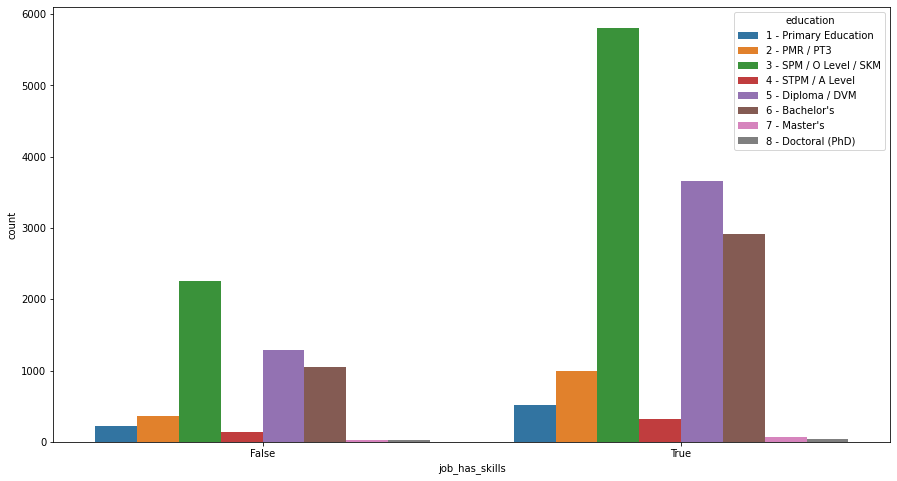

In [96]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_has_skills', hue='education', data=df, hue_order=educations);

### Ignore Skills

In [97]:
df.groupby('ignore_has_skills')['education'].value_counts(normalize=True) * 100

ignore_has_skills  education              
False              3 - SPM / O Level / SKM    41.016773
                   5 - Diploma / DVM          24.278056
                   6 - Bachelor's             20.110669
                   2 - PMR / PT3               7.072454
                   1 - Primary Education       4.150095
                   4 - STPM / A Level          2.559225
                   7 - Master's                0.518762
                   8 - Doctoral (PhD)          0.293965
True               3 - SPM / O Level / SKM    40.965676
                   5 - Diploma / DVM          25.451536
                   6 - Bachelor's             20.141038
                   2 - PMR / PT3               6.814420
                   1 - Primary Education       3.605095
                   4 - STPM / A Level          2.245089
                   7 - Master's                0.474923
                   8 - Doctoral (PhD)          0.302224
Name: education, dtype: float64

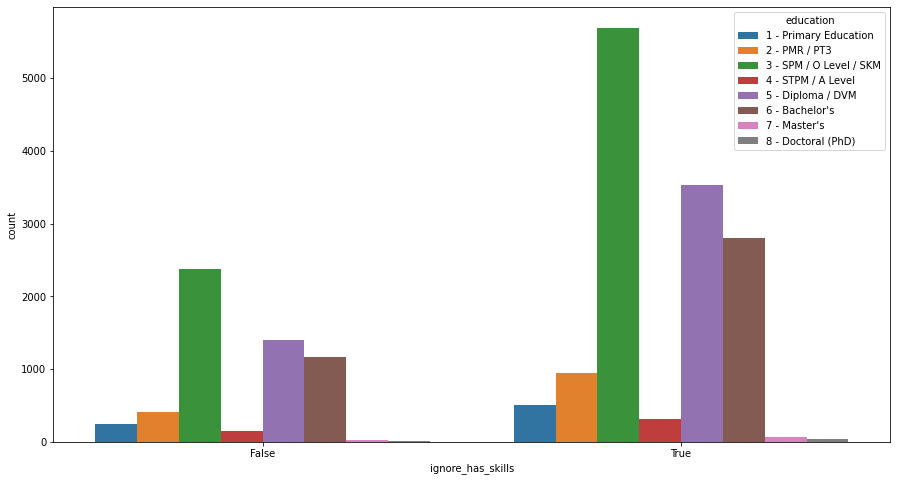

In [98]:
plt.figure(figsize=(15,8))
sns.countplot(x='ignore_has_skills', hue='education', data=df, hue_order=educations);

## Language

### All Skills

In [99]:
df.groupby('has_skills')['job_language'].value_counts(normalize=True) * 100

has_skills  job_language
False       Others          50.494350
            English         49.505650
True        English         92.283951
            Others           7.716049
Name: job_language, dtype: float64

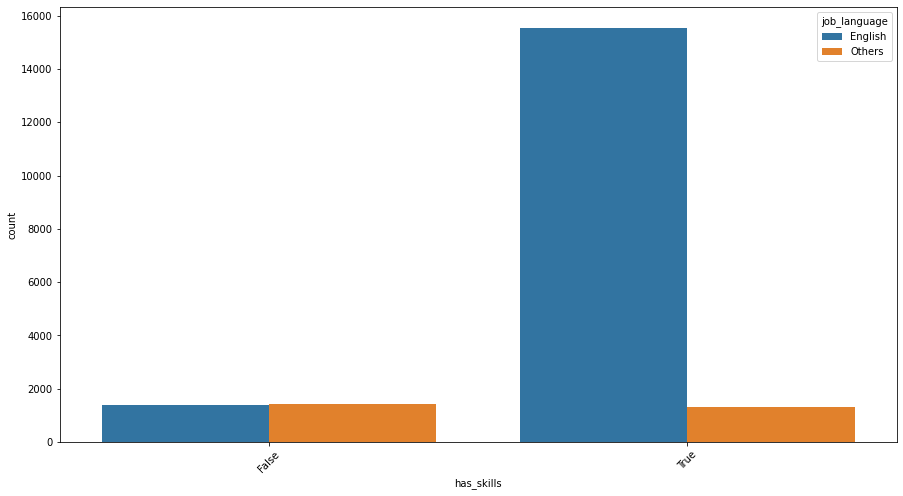

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(x='has_skills', hue='job_language', data=df)
plt.xticks(rotation=45);

### Job Skills

In [101]:
df.groupby('job_has_skills')['job_language'].value_counts(normalize=True) * 100

job_has_skills  job_language
False           English         66.554496
                Others          33.445504
True            English         93.433815
                Others           6.566185
Name: job_language, dtype: float64

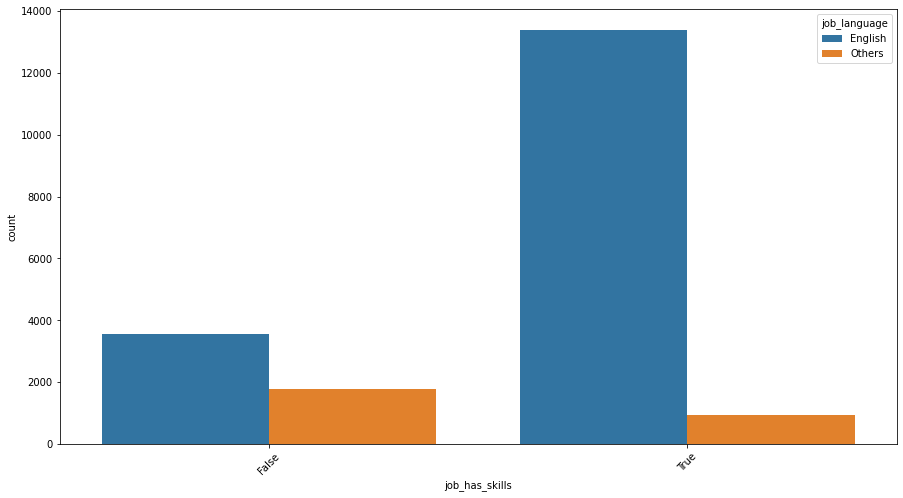

In [102]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_has_skills', hue='job_language', data=df)
plt.xticks(rotation=45);

### Ignore Skills

In [103]:
df.groupby('ignore_has_skills')['job_language'].value_counts(normalize=True) * 100

ignore_has_skills  job_language
False              English         65.536919
                   Others          34.463081
True               English         94.696697
                   Others           5.303303
Name: job_language, dtype: float64

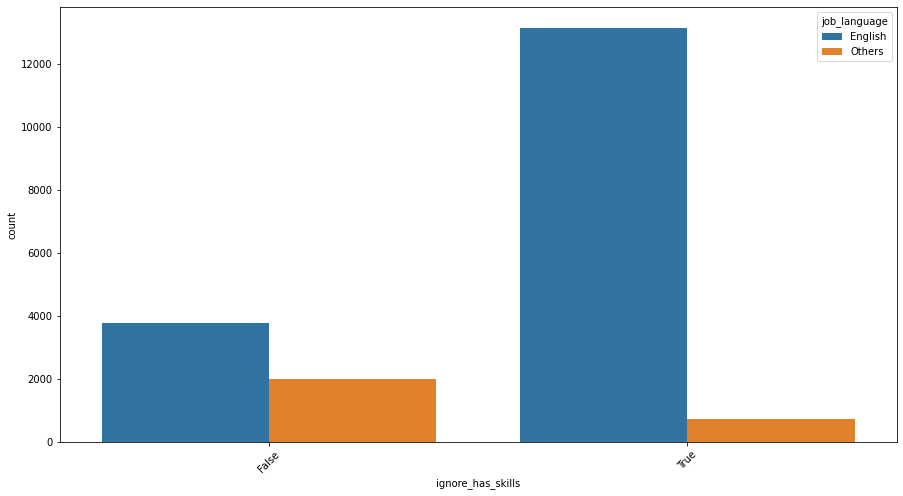

In [104]:
plt.figure(figsize=(15,8))
sns.countplot(x='ignore_has_skills', hue='job_language', data=df)
plt.xticks(rotation=45);

## Number of Skills

### Has (All) Skills

In [105]:
df.groupby('has_skills')[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe().transpose()

has_skills               False         True 
no_skills        count  2832.0  16848.000000
                 mean      0.0      6.670584
                 std       0.0      7.442240
                 min       0.0      1.000000
                 25%       0.0      2.000000
                 50%       0.0      4.000000
                 75%       0.0      8.000000
                 max       0.0     72.000000
no_job_skills    count  2832.0  16848.000000
                 mean      0.0      4.110399
                 std       0.0      5.084533
                 min       0.0      0.000000
                 25%       0.0      1.000000
                 50%       0.0      2.000000
                 75%       0.0      5.000000
                 max       0.0     53.000000
no_ignore_skills count  2832.0  16848.000000
                 mean      0.0      2.560185
                 std       0.0      2.737903
                 min       0.0      0.000000
                 25%       0.0      1.000000
                 50%       0.0      2.000000
                 75%       0.0      3.000000
                 max       0.0     20.000000

In [106]:
df.groupby('has_skills')[['job_has_skills', 'ignore_has_skills']].describe()

job_has_skills                      ignore_has_skills         \
                    count unique    top   freq             count unique   
has_skills                                                                
False                2832      1  False   2832              2832      1   
True                16848      2   True  14331             16848      2   

                          
              top   freq  
has_skills                
False       False   2832  
True         True  13897

In [107]:
df.groupby('has_skills')['job_has_skills'].value_counts(normalize=True) * 100

has_skills  job_has_skills
False       False             100.000000
True        True               85.060541
            False              14.939459
Name: job_has_skills, dtype: float64

In [108]:
df.groupby('has_skills')['ignore_has_skills'].value_counts(normalize=True) * 100

has_skills  ignore_has_skills
False       False                100.000000
True        True                  82.484568
            False                 17.515432
Name: ignore_has_skills, dtype: float64

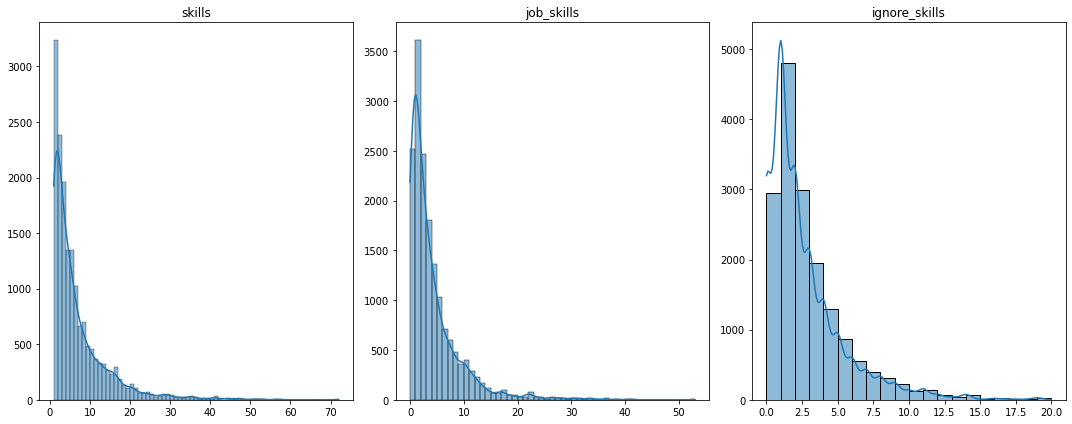

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df.loc[df['has_skills']], kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

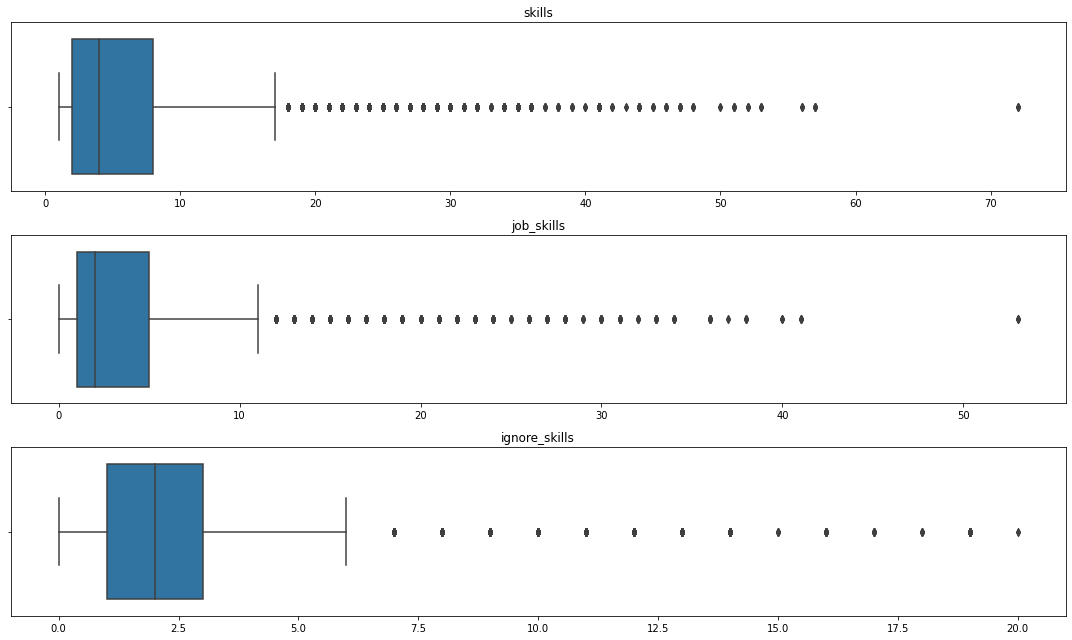

In [110]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df.loc[df['has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

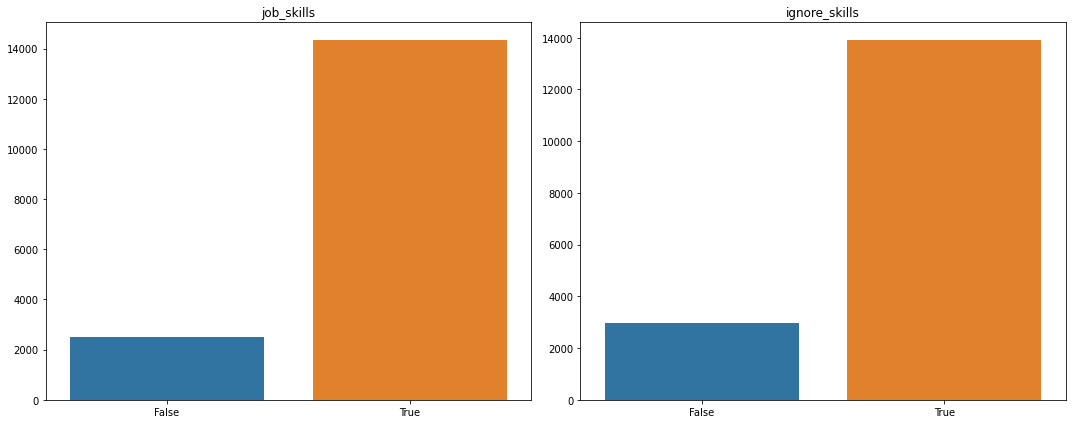

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axis = ['job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df.loc[df['has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

### Has Job Skills

In [112]:
df.groupby('job_has_skills')[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe().transpose()

job_has_skills                False         True 
no_skills        count  5349.000000  14331.000000
                 mean      0.700318      7.580769
                 std       0.900906      7.711861
                 min       0.000000      1.000000
                 25%       0.000000      3.000000
                 50%       0.000000      5.000000
                 75%       1.000000     10.000000
                 max       5.000000     72.000000
no_job_skills    count  5349.000000  14331.000000
                 mean      0.000000      4.832322
                 std       0.000000      5.186959
                 min       0.000000      1.000000
                 25%       0.000000      1.000000
                 50%       0.000000      3.000000
                 75%       0.000000      6.000000
                 max       0.000000     53.000000
no_ignore_skills count  5349.000000  14331.000000
                 mean      0.700318      2.748447
                 std       0.900906      2.911801
                 min       0.000000      0.000000
                 25%       0.000000      1.000000
                 50%       0.000000      2.000000
                 75%       1.000000      4.000000
                 max       5.000000     20.000000

In [113]:
df.groupby('job_has_skills')[['has_skills', 'ignore_has_skills']].describe()

has_skills                      ignore_has_skills         \
                    count unique    top   freq             count unique   
job_has_skills                                                            
False                5349      2  False   2832              5349      2   
True                14331      1   True  14331             14331      2   

                              
                  top   freq  
job_has_skills                
False           False   2832  
True             True  11380

In [114]:
df.groupby('job_has_skills')['has_skills'].value_counts(normalize=True) * 100

job_has_skills  has_skills
False           False          52.944476
                True           47.055524
True            True          100.000000
Name: has_skills, dtype: float64

In [115]:
df.groupby('job_has_skills')['ignore_has_skills'].value_counts(normalize=True) * 100

job_has_skills  ignore_has_skills
False           False                52.944476
                True                 47.055524
True            True                 79.408276
                False                20.591724
Name: ignore_has_skills, dtype: float64

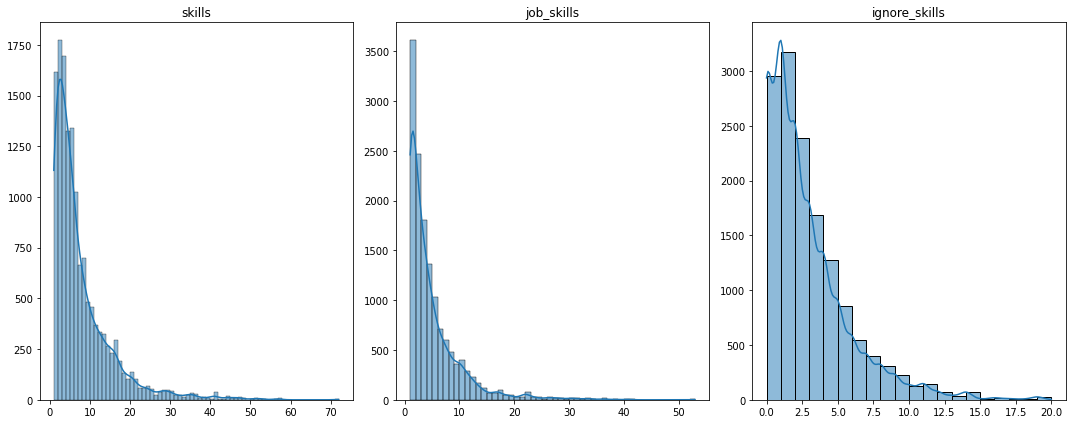

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df.loc[df['job_has_skills']], kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

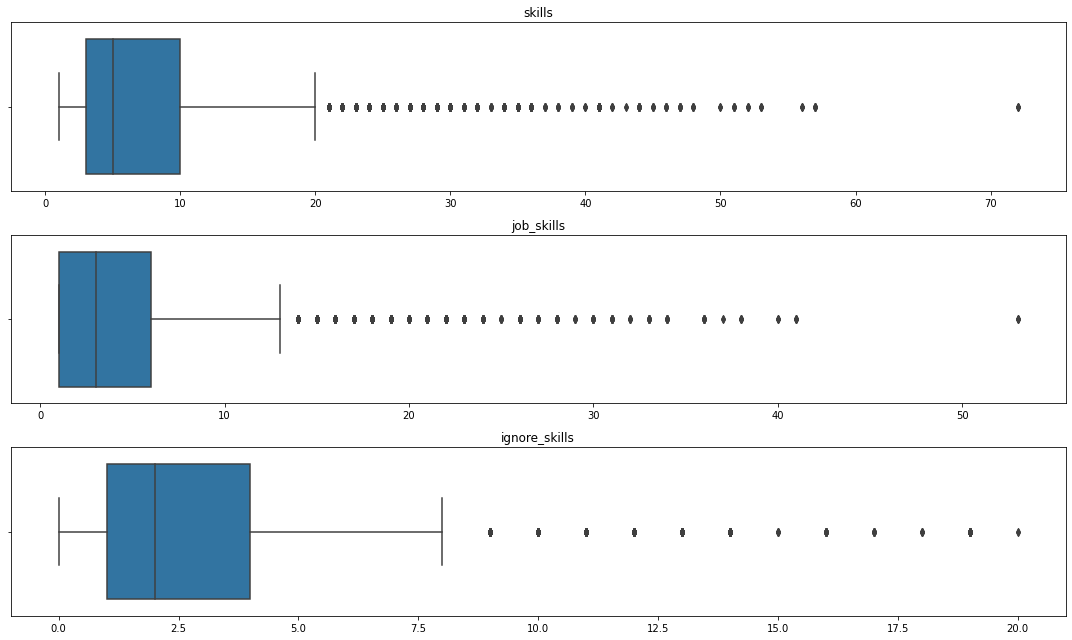

In [117]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df.loc[df['job_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

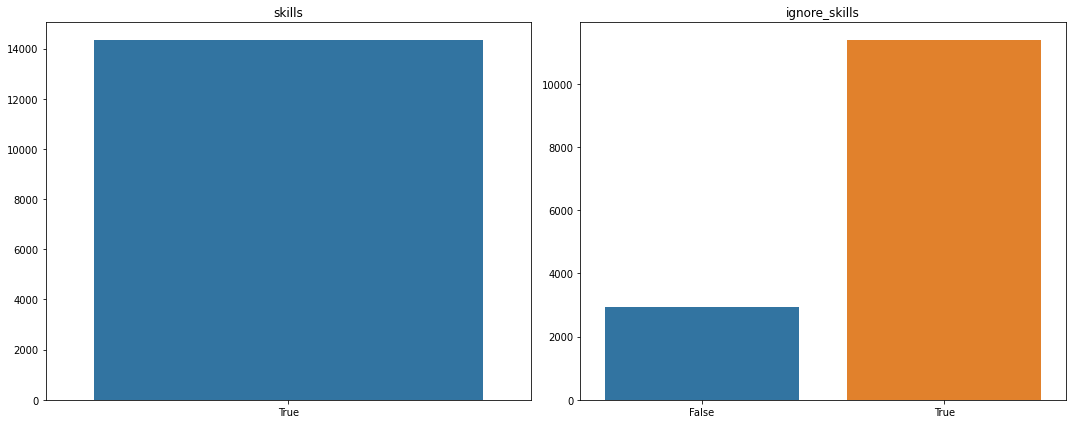

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axis = ['', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df.loc[df['job_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

### Has Ignore Skills

In [119]:
df.groupby('ignore_has_skills')[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe().transpose()

ignore_has_skills             False         True 
no_skills        count  5783.000000  13897.000000
                 mean      0.985302      7.677053
                 std       1.358305      7.809313
                 min       0.000000      1.000000
                 25%       0.000000      3.000000
                 50%       1.000000      5.000000
                 75%       1.000000     10.000000
                 max       9.000000     72.000000
no_job_skills    count  5783.000000  13897.000000
                 mean      0.985302      4.573217
                 std       1.358305      5.453404
                 min       0.000000      0.000000
                 25%       0.000000      1.000000
                 50%       1.000000      3.000000
                 75%       1.000000      6.000000
                 max       9.000000     53.000000
no_ignore_skills count  5783.000000  13897.000000
                 mean      0.000000      3.103835
                 std       0.000000      2.720384
                 min       0.000000      1.000000
                 25%       0.000000      1.000000
                 50%       0.000000      2.000000
                 75%       0.000000      4.000000
                 max       0.000000     20.000000

In [120]:
df.groupby('ignore_has_skills')[['has_skills', 'job_has_skills']].describe()

has_skills                     job_has_skills               \
                       count unique   top   freq          count unique   top   
ignore_has_skills                                                              
False                   5783      2  True   2951           5783      2  True   
True                   13897      1  True  13897          13897      2  True   

                          
                    freq  
ignore_has_skills         
False               2951  
True               11380

In [121]:
df.groupby('ignore_has_skills')['has_skills'].value_counts(normalize=True) * 100

ignore_has_skills  has_skills
False              True           51.028878
                   False          48.971122
True               True          100.000000
Name: has_skills, dtype: float64

In [122]:
df.groupby('ignore_has_skills')['job_has_skills'].value_counts(normalize=True) * 100

ignore_has_skills  job_has_skills
False              True              51.028878
                   False             48.971122
True               True              81.888177
                   False             18.111823
Name: job_has_skills, dtype: float64

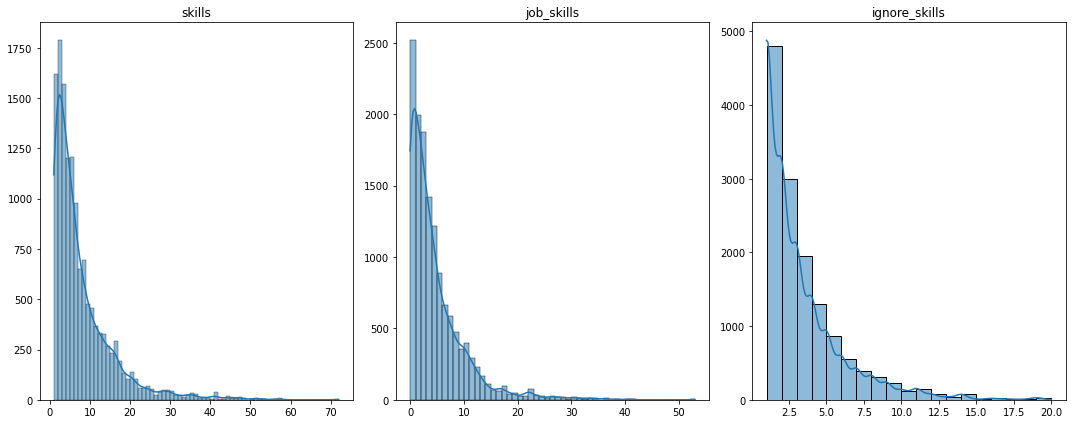

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df.loc[df['ignore_has_skills']], kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

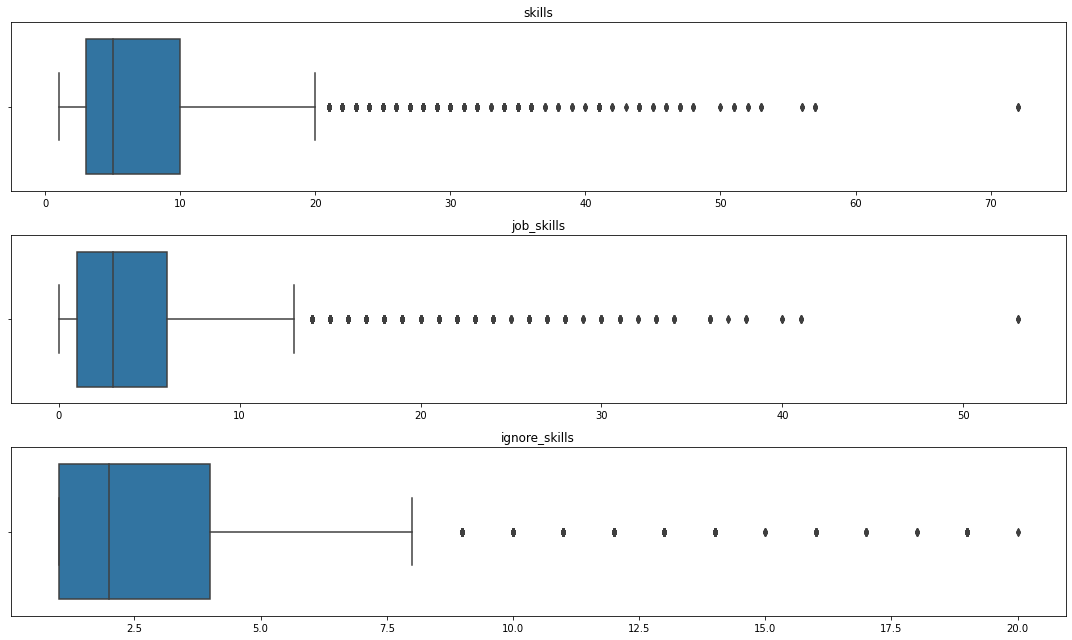

In [124]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df.loc[df['ignore_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

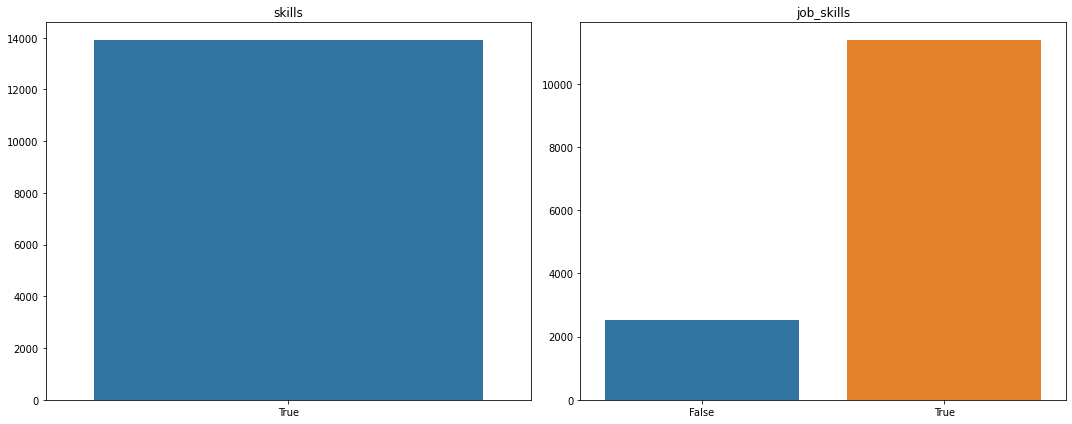

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axis = ['', 'job_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df.loc[df['ignore_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

# Skill Analysis

In [126]:
df_s1 = pd.DataFrame(columns=['index', 'count', 'education'])

for edu in educations:
    #df_temp = get_skill_count(df.loc[df['education'] == edu], 'job_skills').rename(columns={'count': edu})
    #df_s1 = df_s1.merge(df_temp, how='outer', on=['index'])
    df_temp = get_skill_count(df.loc[df['education'] == edu], 'job_skills')
    df_temp['education'] = edu
    df_s1 = df_s1.append(df_temp)

# df_s1['total'] = df_s1.sum(axis=1)
# df_s1 = df_s1.sort_values(by='total', ascending=False)
df_s1 = df_s1.set_index('index')
df_s1.head()

,count,education
index,,
Sales,87,1 - Primary Education
Communication,78,1 - Primary Education
English,69,1 - Primary Education
Management,63,1 - Primary Education
Engineering,42,1 - Primary Education


In [127]:
top_skills = df_s1.groupby('index').sum().sort_values(by='count', ascending=False)
top_skills.head()

,count,education
index,,
Sales,2580,1 - Primary Education2 - PMR / PT33 - SPM / O ...
Communication,2151,1 - Primary Education2 - PMR / PT33 - SPM / O ...
English,1932,1 - Primary Education2 - PMR / PT33 - SPM / O ...
Management,1893,1 - Primary Education2 - PMR / PT33 - SPM / O ...
Training,1398,1 - Primary Education2 - PMR / PT33 - SPM / O ...


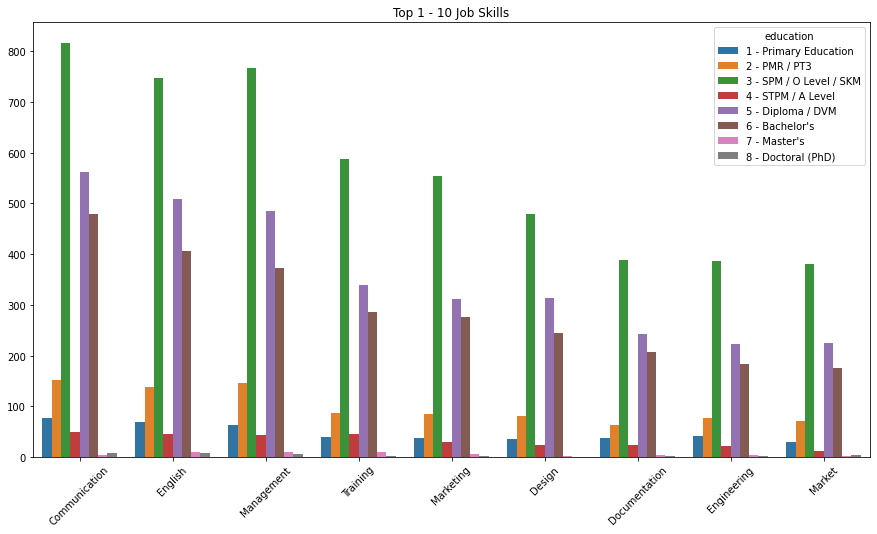

In [128]:
s, e = 1, 10
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

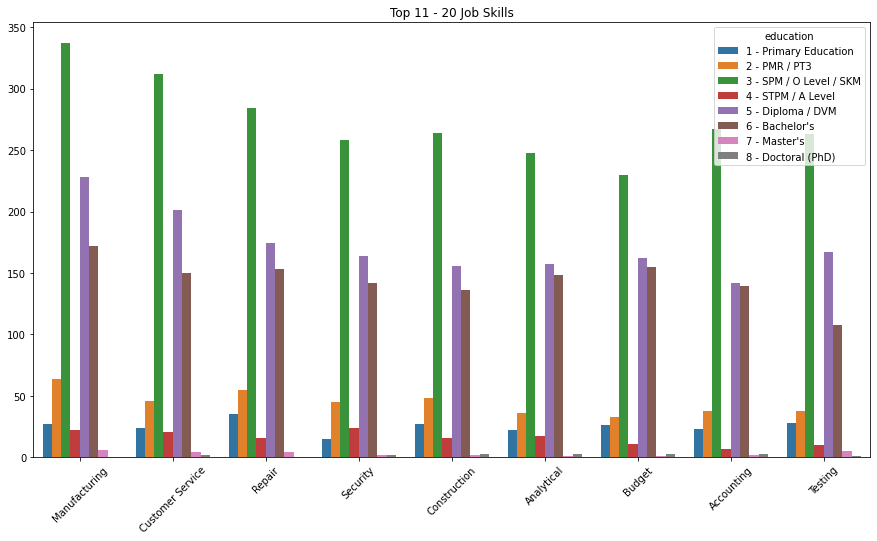

In [129]:
s, e = 11, 20
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

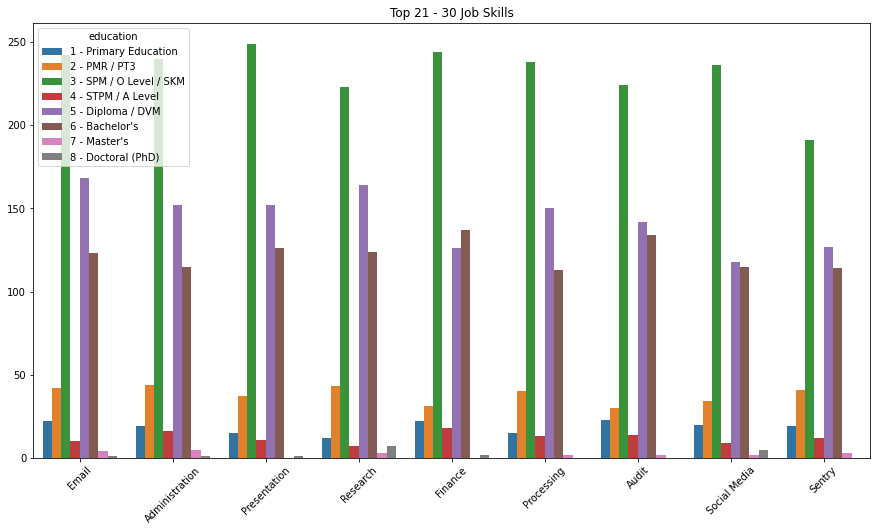

In [130]:
s, e = 21, 30
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

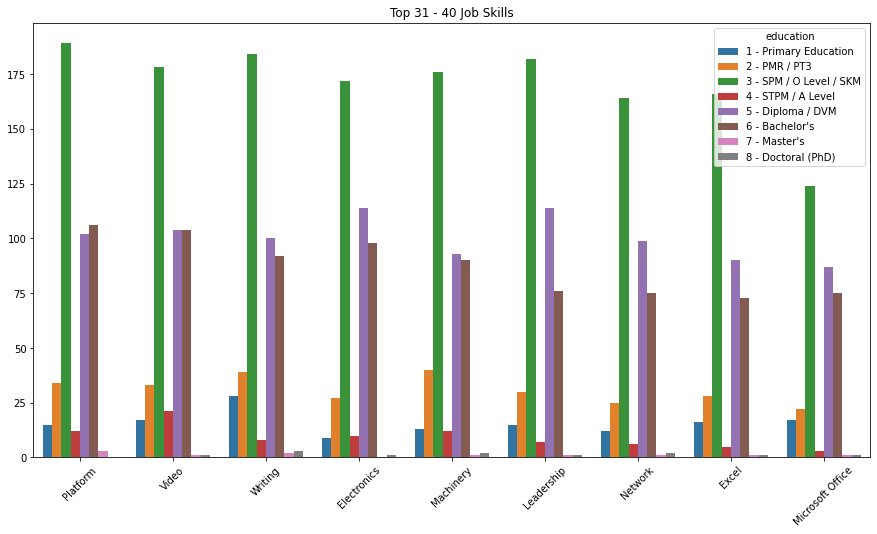

In [131]:
s, e = 31, 40
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

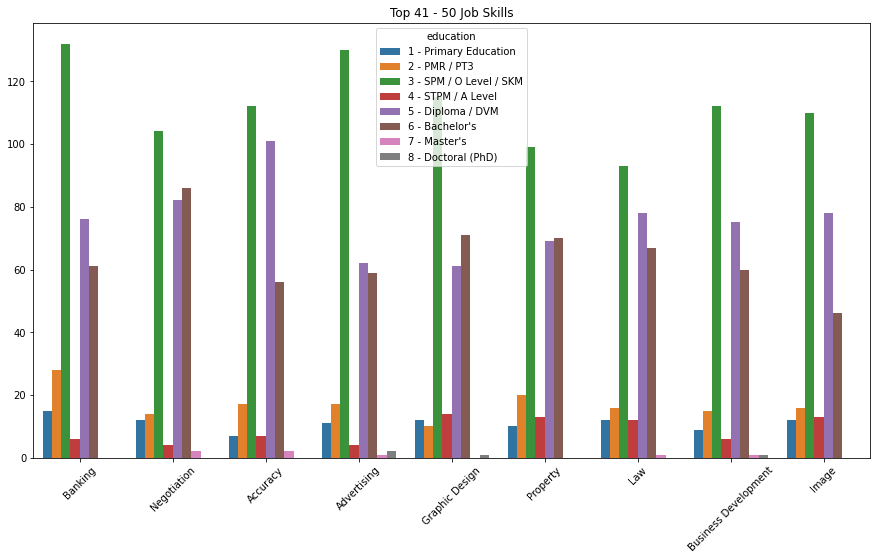

In [132]:
s, e = 41, 50
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

# Include Domain

In [133]:
df_sf = pd.DataFrame(columns=['index'])

for edu in educations:
    df_temp = get_skill_count(df.loc[df['education'] == edu], 'job_skills').rename(columns={'count': edu})
    df_sf = df_sf.merge(df_temp, how='outer', on=['index'])

df_sf['total'] = df_sf.sum(axis=1)
df_sf = df_sf.sort_values(by='total', ascending=False)
df_sf.head()

,index,1 - Primary Education,2 - PMR / PT3,3 - SPM / O Level / SKM,4 - STPM / A Level,5 - Diploma / DVM,6 - Bachelor's,7 - Master's,8 - Doctoral (PhD),total
0,Sales,87.0,162.0,1064.0,59.0,655.0,536.0,13.0,4.0,2580.0
1,Communication,78.0,153.0,816.0,49.0,562.0,479.0,5.0,9.0,2151.0
2,English,69.0,138.0,747.0,45.0,508.0,407.0,10.0,8.0,1932.0
3,Management,63.0,146.0,766.0,43.0,486.0,373.0,10.0,6.0,1893.0
5,Training,39.0,88.0,587.0,45.0,340.0,287.0,10.0,2.0,1398.0


In [134]:
df_skills = pd.read_csv('skills_db2/skill.csv')
df_dom = pd.read_csv('skills_db2/domain.csv')
df_skills = df_skills.replace(df_dom.set_index('Id').to_dict()['Domain']).rename(columns={'DomainId': 'Domain'})
df_skills.head()

,Id,Skill,Domain
0,Applied Science,Account Receivable,Business
1,Arts and Humanities,Accountancy,Business
2,Business,Accounting,Business
3,Computer Science,Accounting Software,Business
4,Data Science,Accounting Standards,Business


In [135]:
to_keep = ['Business', 'Computer Science', 'Data Science', 'Information Technology (IT)']
df_dom2 = df_skills.copy()
df_dom2.loc[~df_skills['Domain'].isin(to_keep), 'Domain'] = 'Others'
df_dom2.head()

,Id,Skill,Domain
0,Applied Science,Account Receivable,Business
1,Arts and Humanities,Accountancy,Business
2,Business,Accounting,Business
3,Computer Science,Accounting Software,Business
4,Data Science,Accounting Standards,Business


In [136]:
df_s1 = df_s1.reset_index()

for i, row in df_s1.iterrows():
    skill = row['index']
    try:
        df_s1.loc[i, 'domain'] = df_dom2.loc[df_dom2['Skill'] == skill]['Domain'].item()
    except:
        df_s1.loc[i, 'domain'] = skill if skill in to_keep else 'Others'

df_s1.head()

,index,count,education,domain
0,Sales,87,1 - Primary Education,Business
1,Communication,78,1 - Primary Education,Business
2,English,69,1 - Primary Education,Others
3,Management,63,1 - Primary Education,Business
4,Engineering,42,1 - Primary Education,Others


In [137]:
df_s1['domain'].unique()

array(['Business', 'Others', 'Computer Science',
       'Information Technology (IT)', 'Data Science'], dtype=object)

In [138]:
for i, row in df_sf.iterrows():
    skill = row['index']
    try:
        df_sf.loc[i, 'domain'] = df_dom2.loc[df_dom2['Skill'] == skill]['Domain'].item()
    except:
        df_sf.loc[i, 'domain'] = skill if skill in to_keep else 'Others'

df_sf.head()

,index,1 - Primary Education,2 - PMR / PT3,3 - SPM / O Level / SKM,4 - STPM / A Level,5 - Diploma / DVM,6 - Bachelor's,7 - Master's,8 - Doctoral (PhD),total,domain
0,Sales,87.0,162.0,1064.0,59.0,655.0,536.0,13.0,4.0,2580.0,Business
1,Communication,78.0,153.0,816.0,49.0,562.0,479.0,5.0,9.0,2151.0,Business
2,English,69.0,138.0,747.0,45.0,508.0,407.0,10.0,8.0,1932.0,Others
3,Management,63.0,146.0,766.0,43.0,486.0,373.0,10.0,6.0,1893.0,Business
5,Training,39.0,88.0,587.0,45.0,340.0,287.0,10.0,2.0,1398.0,Business


In [139]:
df_sf['domain'].unique()

array(['Business', 'Others', 'Information Technology (IT)',
       'Computer Science', 'Data Science'], dtype=object)

## Popular Domains

In [140]:
df_sf.groupby('domain').sum()

,1 - Primary Education,2 - PMR / PT3,3 - SPM / O Level / SKM,4 - STPM / A Level,5 - Diploma / DVM,6 - Bachelor's,7 - Master's,8 - Doctoral (PhD),total
domain,,,,,,,,,
Business,1321.0,2449.0,15228.0,874.0,9491.0,7878.0,149.0,90.0,37480.0
Computer Science,341.0,562.0,4186.0,249.0,2540.0,2183.0,50.0,19.0,10130.0
Data Science,55.0,82.0,595.0,49.0,397.0,379.0,5.0,1.0,1563.0
Information Technology (IT),142.0,291.0,1763.0,98.0,1024.0,923.0,15.0,16.0,4272.0
Others,533.0,1091.0,6391.0,378.0,3974.0,3316.0,77.0,47.0,15807.0


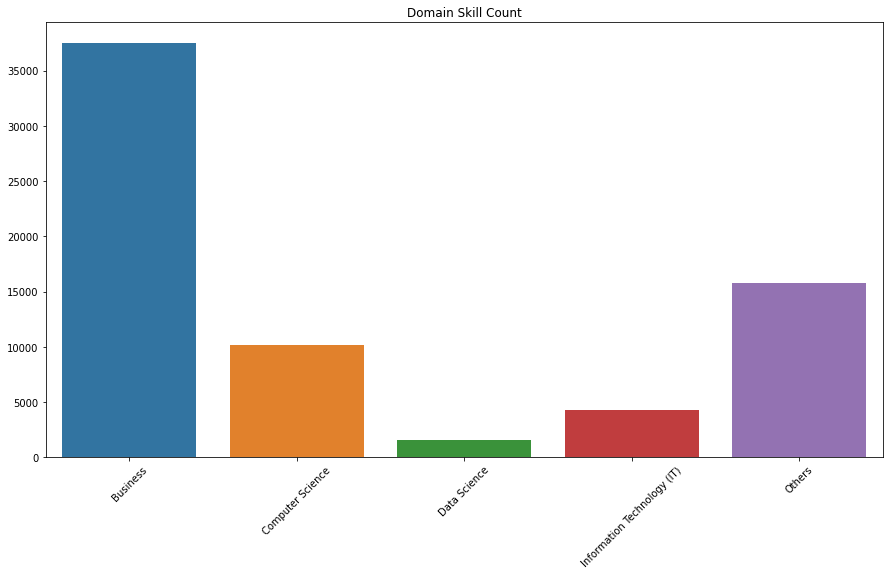

In [141]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='domain', y='total', data=df_sf.groupby('domain').sum().reset_index())
ax.set_title('Domain Skill Count')
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

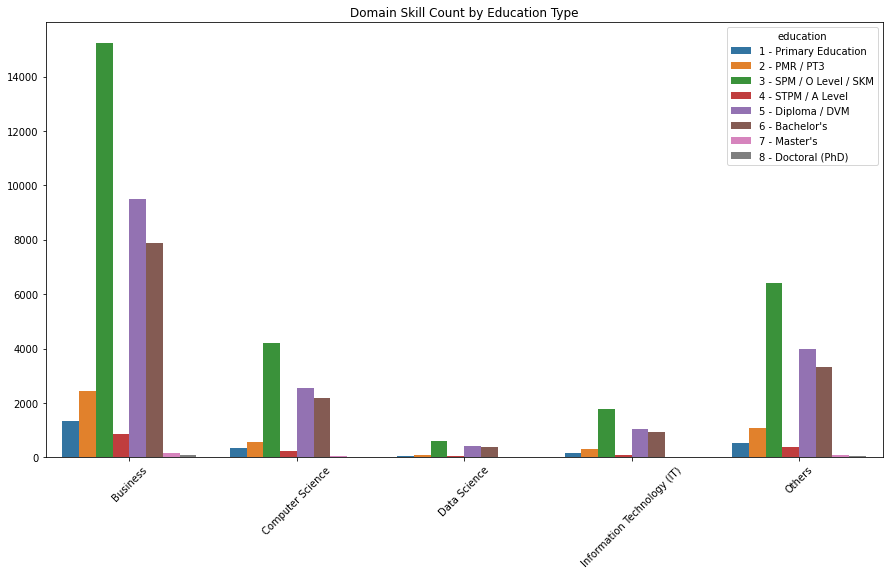

In [143]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='domain', y='count', hue='education', data=df_s1.groupby(['domain', 'education']).sum().reset_index())
ax.set_title('Domain Skill Count by Education Type')
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

## Popular Skills of Domain

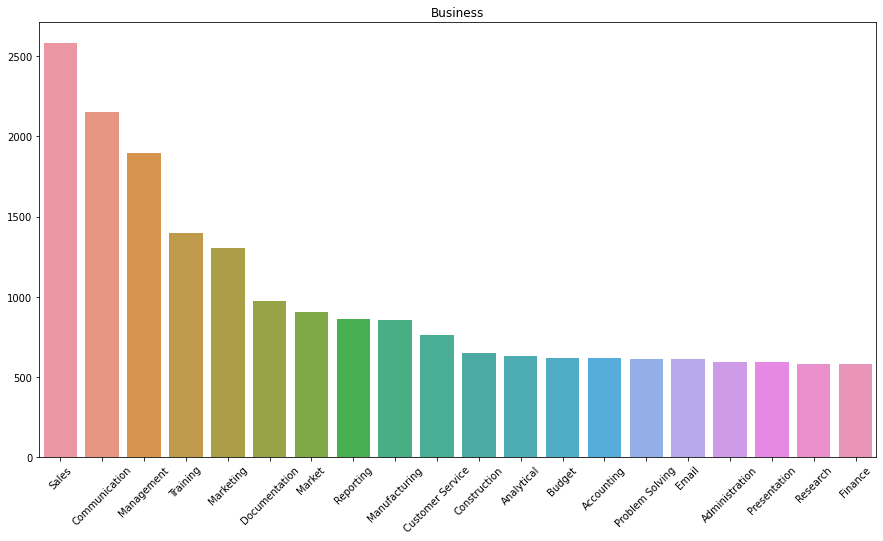

In [144]:
domain = 'Business'
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='total', data=df_sf.loc[df_sf['domain'] == domain].iloc[:20])
ax.set_title(domain)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

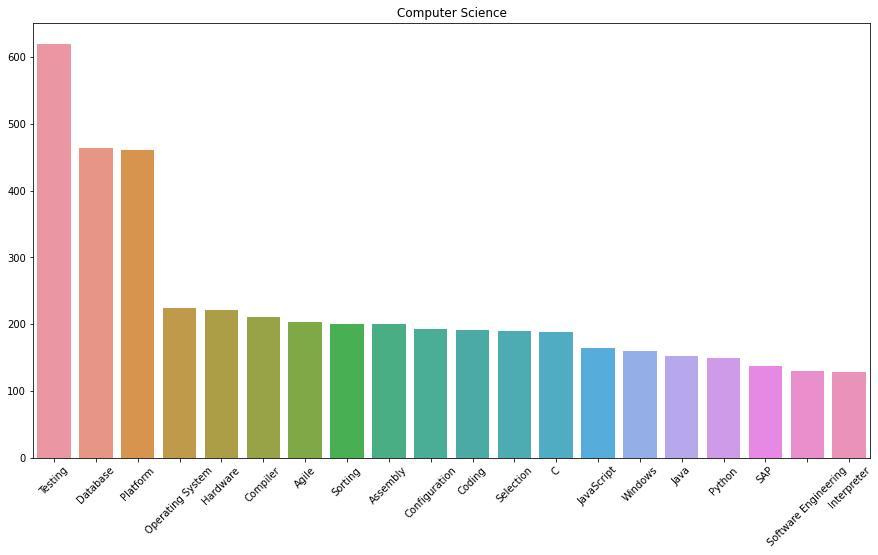

In [145]:
domain = 'Computer Science'
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='total', data=df_sf.loc[df_sf['domain'] == domain].iloc[:20])
ax.set_title(domain)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

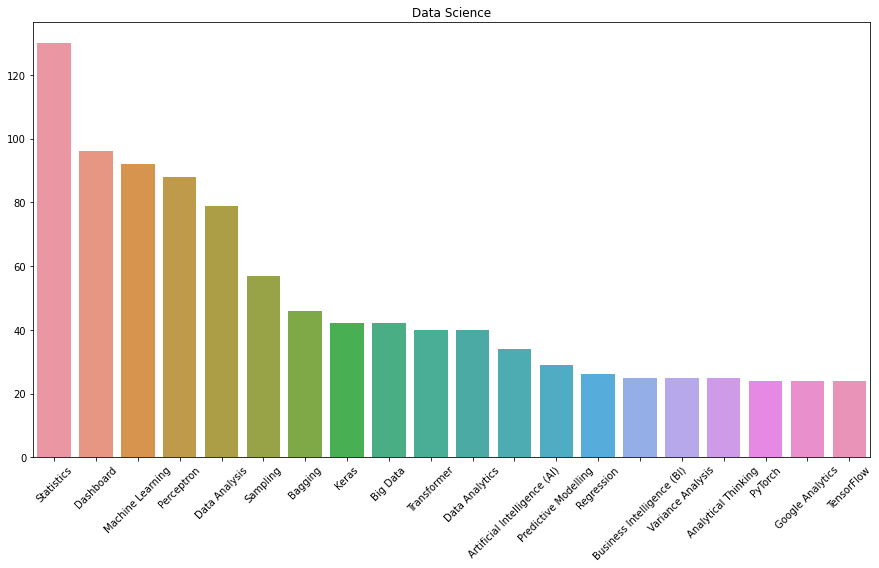

In [146]:
domain = 'Data Science'
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='total', data=df_sf.loc[df_sf['domain'] == domain].iloc[:20])
ax.set_title(domain)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

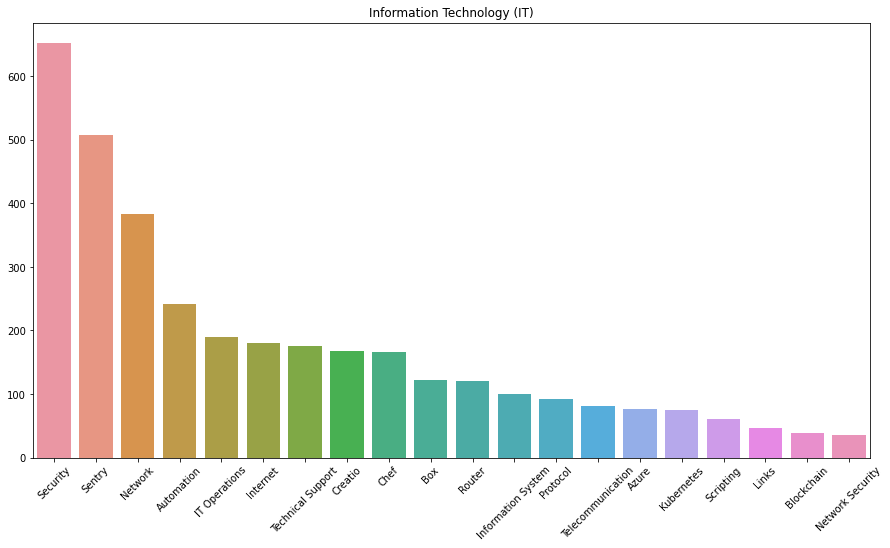

In [147]:
domain = 'Information Technology (IT)'
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='total', data=df_sf.loc[df_sf['domain'] == domain].iloc[:20])
ax.set_title(domain)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

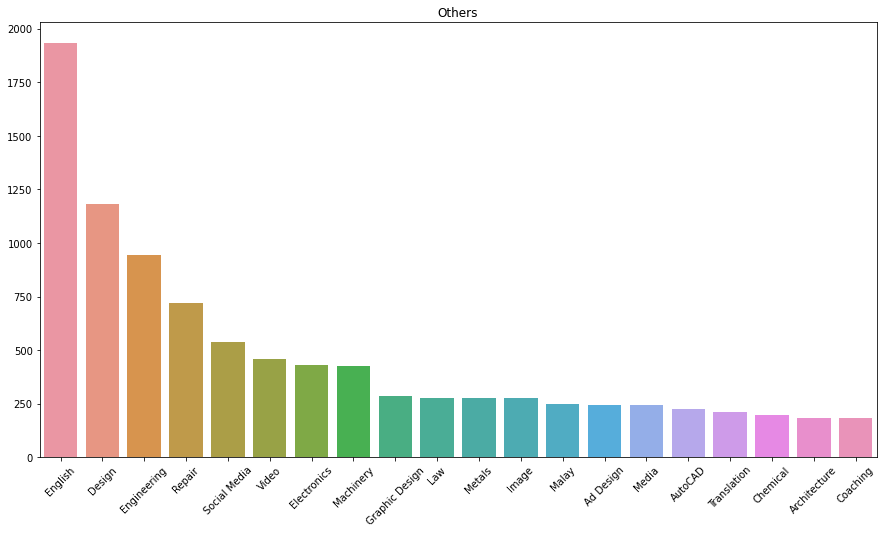

In [148]:
domain = 'Others'
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='total', data=df_sf.loc[df_sf['domain'] == domain].iloc[:20])
ax.set_title(domain)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

In [151]:
df_final = df_sf[['index', 'domain', 'total']].rename(columns={'index': 'Skill', 'total': 'Count', 'domain': 'Domain'})
now = dt.datetime.now()
df_final['JobPostedMonth'] = dt.datetime(now.year, now.month, 1)
df_final['Source'] = 'MYFutureJobs'
df_final.head()

,Skill,Domain,Count,JobPostedMonth,Source
0,Sales,Business,2580.0,2021-01-01,MYFutureJobs
1,Communication,Business,2151.0,2021-01-01,MYFutureJobs
2,English,Others,1932.0,2021-01-01,MYFutureJobs
3,Management,Business,1893.0,2021-01-01,MYFutureJobs
5,Training,Business,1398.0,2021-01-01,MYFutureJobs


In [152]:
df_sf.to_csv('myfuturejobs-insights/Skills.csv', index=False)
df_final.to_csv('myfuturejobs-insights/ForAcceltic.csv', index=False)